# Investigating Covid-19 Dataset 
## Data for (2-2020 / 7-2020)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Coronavirus** is a virus family that can cause illness ranging from a *common cold* and *cough* to more serious disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were two of the world's most severe instances.
**SARS-CoV-2 (n-coronavirus)** is a new coronavirus that was first *discovered* in 2019 and has never before been found in humans. It is a *contiguous* virus that began in December 2019 in **Wuhan**. Due to high rate spreads over the world, it was later labelled a **Pandemic** by the **WHO**. Currently (as of June 10, 2020), this results in a total of *500K+ Deaths* over the world. As the pandemic spreads over the globe, it is becoming increasingly vital to comprehend its spread. This NoteBook is an attempt to look back on the cumulative data of confirmed, Deaths, and recovered cases over time. The main goal of this notebook is to examine the global spread pattern of this pathogen.
>
> The Dataset is collecting data for 6 Regions for the World Health Organization, for 187 countries, for 188 days, starting from 22-01-2020 to 27-07-2020
>
> In this investigation we are going to explore more details about the start of the pandemic through the world, How the virus was spreading and try to find more stats about the pandemic. 

> I this investigatio We are going to ask some Questions trying to find more about the pandemic, our questions are:
>
> Q1: What was the total number of the new Cases around the world? and How was the rate of spread of the virus?
>
> Q2: What was the total number of Deaths around the world? How the stats of Death has changed through this period?
>
> Q3: How was the recovery around the world?
>
> Q4: Numbers of the active Cases at the end of this period? 
>
> Q5: How are the status in each region?
>
> Q6: How was the Eastern Mediterranean region facing the Virus?
> 
> Q7: How was the epidemiological situation in Egypt?
>
> Q8: which Countries were having the worst situations?


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


#importing the needed packages

In [2]:
df=pd.read_csv("full_grouped_P.csv")

#importing the dataset file

In [3]:
df.info()

#checking for the info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [4]:
df.head()

#quick view for the data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,1/22/2020,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,1/22/2020,Albania,0,0,0,0,0,0,0,Europe
2,1/22/2020,Algeria,0,0,0,0,0,0,0,Africa
3,1/22/2020,Andorra,0,0,0,0,0,0,0,Europe
4,1/22/2020,Angola,0,0,0,0,0,0,0,Africa


In [5]:
df.duplicated().sum()

#checking for duplicates
#we found no duplicated rows

0

In [6]:
df['WHO Region'].unique(), df['WHO Region'].nunique()


#we have 6 WHO Regions 

(array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
        'Western Pacific', 'South-East Asia'], dtype=object),
 6)

In [7]:
df['Country/Region'].nunique()

#we have data for 187 Country all around the world

187

In [8]:
df.isnull().sum()

#checking for any missing data, but we fortunatelly found no missing data.

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [9]:
df.shape

# get the number of columns and rows

(35156, 10)

In [10]:
df.describe()

#get a quick description for the data

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


### Data Cleaning 
#### (change type of some columns, insert new columns, and rename some others)

In [11]:
df["Date"]=pd.to_datetime(df.Date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


change the type of the column "Date" to be in datetime type.

In [13]:
df["month"]= df['Date'].apply(lambda x: x.month)


#insert a new column "month" showing the month of the confirmed records.

In [14]:
df.rename(columns={"Country/Region":"country", "WHO Region": "who_region", "Province/State":"state", "New deaths": "new_death", "New recovered": "new_recovered", "New cases": "new_cases" }, inplace=True)

#renaming some columns

In [15]:
df.head()

#recheck the table and the new columns.

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,1
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,1
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,1
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,1
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,1


In [16]:
df_africa= df[df['who_region']== "Africa"]
df_europe= df[df['who_region']== "Europe"]
df_estmed= df[df['who_region']== "Eastern Mediterranean"]
df_wstpcf= df[df['who_region']== "Western Pacific"]
df_amrics= df[df['who_region']== "Americas"]
df_sthesa= df[df['who_region']== "South-East Asia"]


# df_africa: Data for the countries of the WHO Region of Africa.
# df_europe: Data for the countries of the WHO Region of Europe.
# df_estmed: Data for the countries of the WHO Region of Eastern Mediterranean.
# df_wstpcf: Data for the countries of the WHO Region of Western Pacific.
# df_amircs: Data for the countries of the WHO Region of Americas.
# df_sthesa: Data for the countries of the WHO Region of South-East Asia.

<a id='eda'></a>
## Exploratory Data Analysis


### Q1:  What was the total number of the new Cases around the world? and How was the rate of spread of the virus?

In [17]:
conf_all= df.new_cases.sum()
conf_all

#conf_all: numer of the whole confirmed Cases around the globe.

16500952

total number of confirmed cases around the world in this period was 16,500,952.

In [18]:
conf_cases= df.groupby("Date")["Confirmed"].sum()
conf_cases

#conf_cases: number of the confirmed cases in the whole world each day.

Date
2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-23    15510481
2020-07-24    15791645
2020-07-25    16047190
2020-07-26    16251796
2020-07-27    16480485
Name: Confirmed, Length: 188, dtype: int64

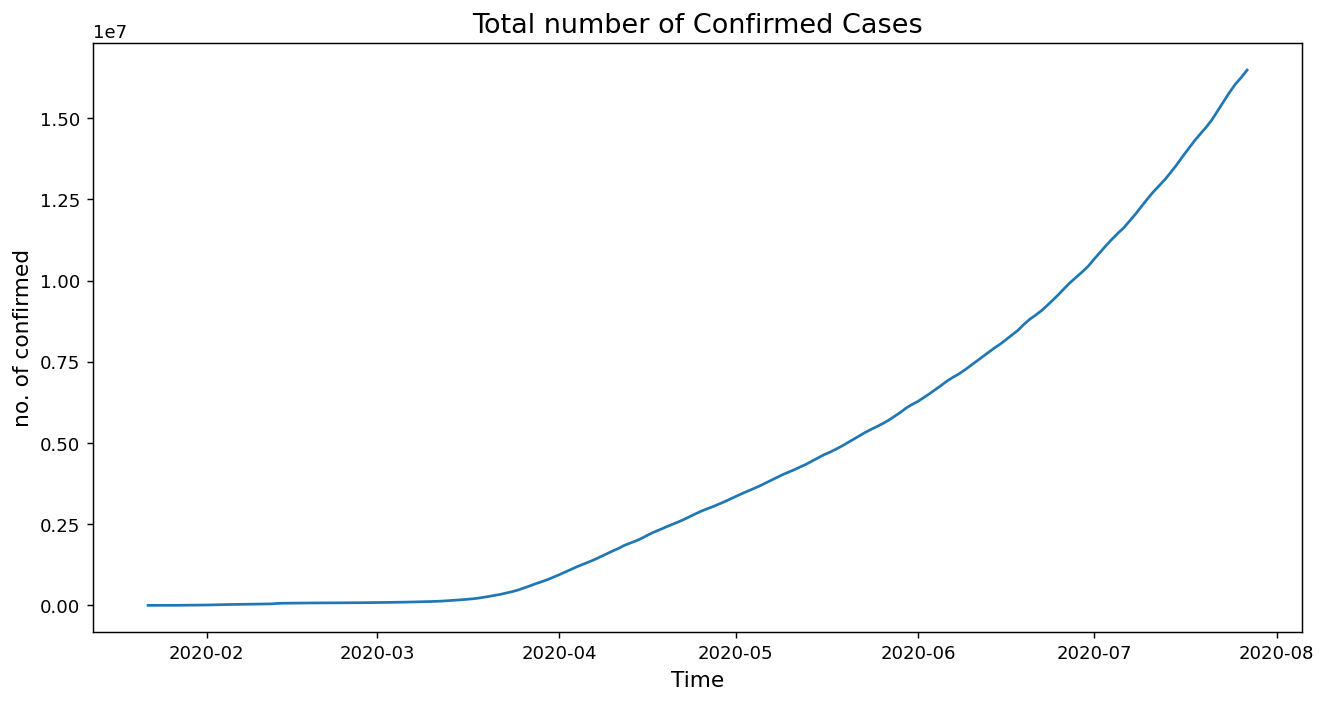

In [19]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Cases', fontsize=15)


plt.plot(conf_cases)


plt.show()

data and the graph showing how the numbers have been increased through the recorded period, and how have the number have been highly increased starting from April.

In [20]:
nc= df.groupby("Date")["new_cases"].sum()
nc

#nc: total number of the new cases of each day for the whole world.

Date
2020-01-22         0
2020-01-23        99
2020-01-24       287
2020-01-25       493
2020-01-26       684
               ...  
2020-07-23    282756
2020-07-24    281164
2020-07-25    255545
2020-07-26    204606
2020-07-27    228693
Name: new_cases, Length: 188, dtype: int64

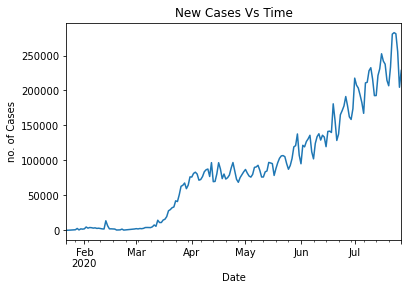

In [21]:
nc.plot(title="New Cases Vs Time", ylabel="no. of Cases");

Here we can see how was the numbers of the new cases each day and how was that in a continuous increasing through time.

In [22]:
nc_mnth=nc_mnth = df.groupby("month")["new_cases"].sum()
nc_mnth

#nc_mnth: number of the whole new cases for each month in the whol world.

month
1       9372
2      75379
3     786064
4    2412383
5    2921042
6    4265801
7    6030911
Name: new_cases, dtype: int64

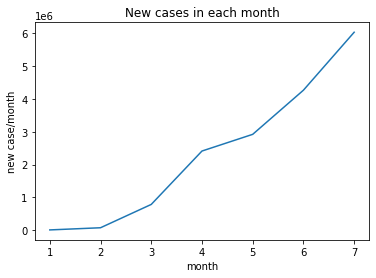

In [23]:
nc_mnth.plot(ylabel=("new case/month"), title="New cases in each month");

we can see how was the situation by months and how it was increasing.

In [24]:
nc_per_hr= nc_mnth /(30*24)
nc_per_hr

#nc_per_hr: number of new cases per hour in the whole world for each month.

month
1      13.016667
2     104.693056
3    1091.755556
4    3350.531944
5    4057.002778
6    5924.723611
7    8376.265278
Name: new_cases, dtype: float64

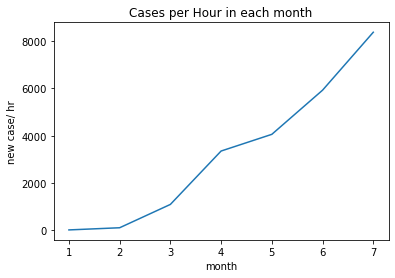

In [25]:
nc_per_hr.plot(ylabel=("new case/ hr"), title="Cases per Hour in each month");

we can see how was the spread rate each month and how we reached to 8376 new case per hour in July.

### Q2: What was the total number of Deaths around the world? How the stats of Death has changed through this period?

In [26]:
dth_all= df.new_death.sum()
dth_all

#dth_all: number of the whole confirmed deaths around the globe.

654019

In [27]:
dth_prcnt= dth_all/conf_all *100
dth_prcnt

#dth_prcnt: percentage of Deaths out of the whole cases.

3.9635228318947897

we sadly lost 654019 in this period with 3.96% out of the whole cases.

In [28]:
conf_dth= df.groupby("Date")["Deaths"].sum()
conf_dth

#conf_dth: number of the confirmed Deaths in the whole world each day.

Date
2020-01-22        17
2020-01-23        18
2020-01-24        26
2020-01-25        42
2020-01-26        56
               ...  
2020-07-23    633506
2020-07-24    639650
2020-07-25    644517
2020-07-26    648621
2020-07-27    654036
Name: Deaths, Length: 188, dtype: int64

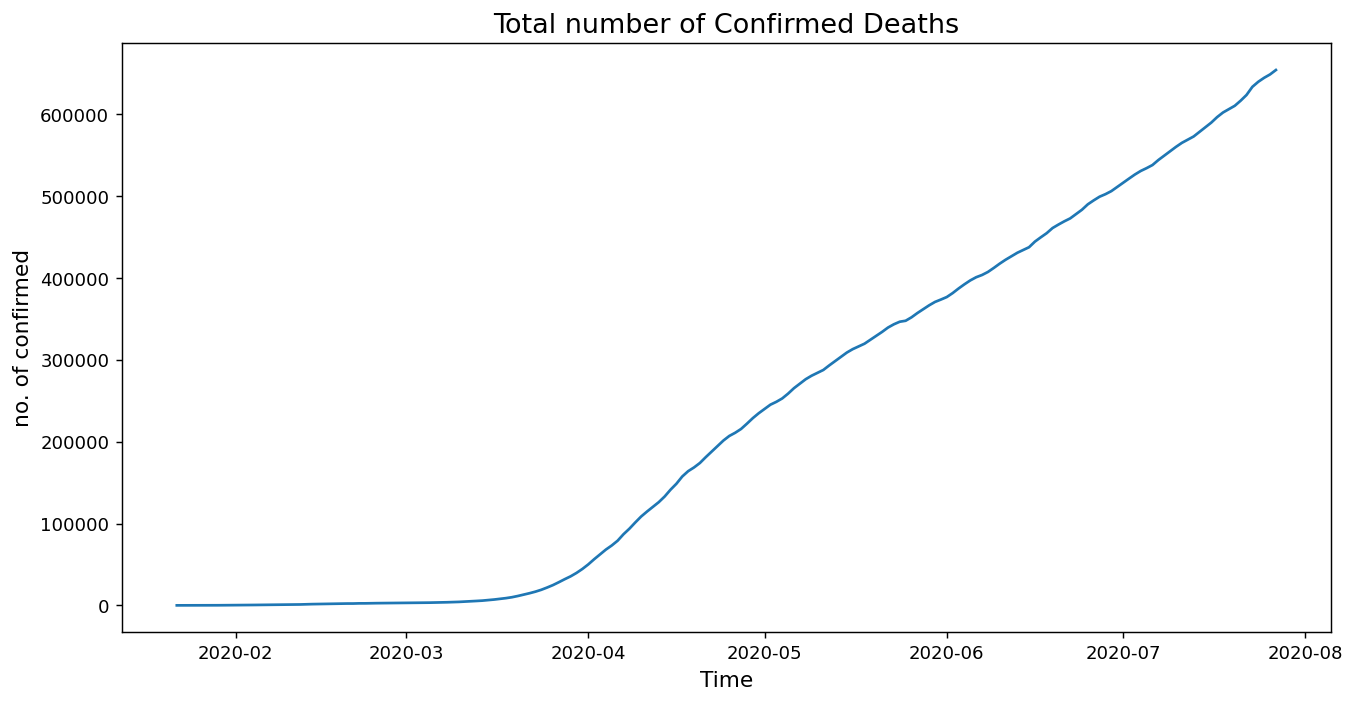

In [29]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Deaths', fontsize=15)


plt.plot(conf_dth)


plt.show()

The graph show how the numbers have been increasing, and the impact due to the increasing in the number of cases.

In [30]:
nd= df.groupby("Date")["new_death"].sum()
nd

#nd: total number of the new Deaths of each day for the whole world.

Date
2020-01-22       0
2020-01-23       1
2020-01-24       8
2020-01-25      16
2020-01-26      14
              ... 
2020-07-23    9966
2020-07-24    6144
2020-07-25    4867
2020-07-26    4104
2020-07-27    5415
Name: new_death, Length: 188, dtype: int64

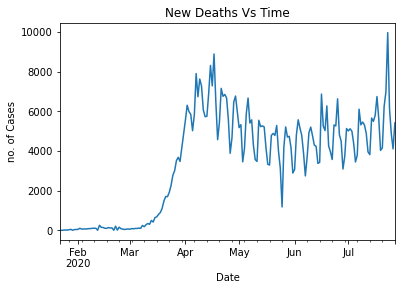

In [31]:
nd.plot(title="New Deaths Vs Time", ylabel="no. of Cases");

we can see that the number of Deathswas increasing by April then numbers were reduced till June and then we saw increasing againby july and the end of the Period.

In [32]:
nd_mnth = df.groupby("month")["new_death"].sum()
nd_mnth

#nd_mnth: total number of the new Deaths of each month for the whole world.

month
1       196
2      2723
3     41542
4    190226
5    138902
6    137604
7    142826
Name: new_death, dtype: int64

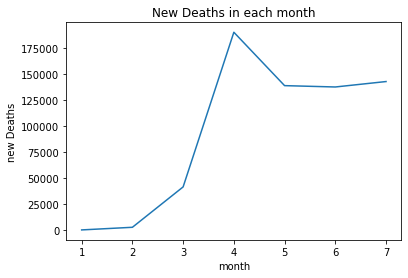

In [33]:
nd_mnth.plot(ylabel=("new Deaths"), title="New Deaths in each month");

April was the month of the most Deaths all around the world with 190,226 deaths. 

In [34]:
nd_per_hr= nd_mnth /(30*24)
nd_per_hr

#nd_per_hr: number of deaths per hour in the whole world for each month.

month
1      0.272222
2      3.781944
3     57.697222
4    264.202778
5    192.919444
6    191.116667
7    198.369444
Name: new_death, dtype: float64

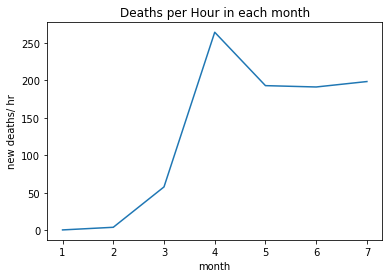

In [35]:
nd_per_hr.plot(ylabel=("new deaths/ hr"), title="Deaths per Hour in each month");

in April we were facing 264 death per hour 

### Q3: How was the recovery around the world?

In [36]:
rec_all= df.new_recovered.sum()
rec_all

#rec_all: number of the whole confirmed recovered Cases around the globe.

9468059

In [37]:
rec_prcnt= rec_all/conf_all *100
rec_prcnt

#rec_prcnt: percentage of the recvered cases out of the whole cases.

57.37886517093075

at the other side we have 9,468,059 patient have recovered with 57.38% out of the whole cases.

In [38]:
conf_rec= df.groupby("Date")["Recovered"].sum()
conf_rec

#conf_rec: number of the confirmed recovered cases in the whole world each day.

Date
2020-01-22         28
2020-01-23         30
2020-01-24         36
2020-01-25         39
2020-01-26         52
               ...   
2020-07-23    8710969
2020-07-24    8939705
2020-07-25    9158743
2020-07-26    9293464
2020-07-27    9468087
Name: Recovered, Length: 188, dtype: int64

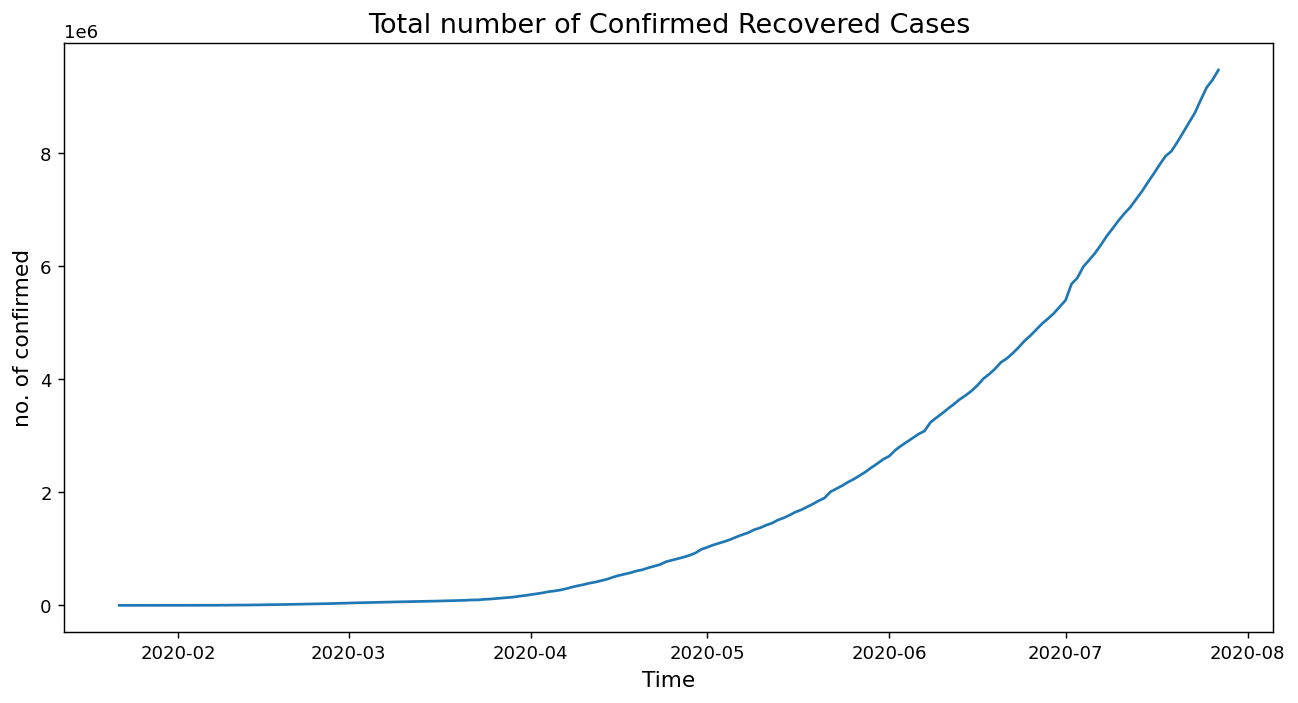

In [39]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Recovered Cases', fontsize=15)


plt.plot(conf_rec)


plt.show()

Fortunately the number of recoveries were also increasing by time

In [40]:
nr= df.groupby("Date")["new_recovered"].sum()
nr

#nr: total number of the new recovered cases of each day for the whole world.

Date
2020-01-22         0
2020-01-23         2
2020-01-24         6
2020-01-25         3
2020-01-26        13
               ...  
2020-07-23    169714
2020-07-24    228736
2020-07-25    219038
2020-07-26    134721
2020-07-27    174623
Name: new_recovered, Length: 188, dtype: int64

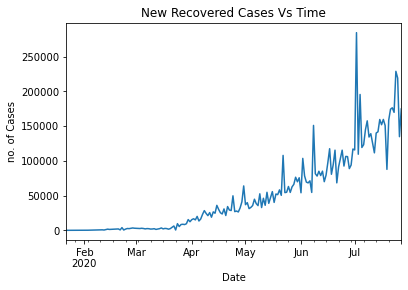

In [41]:
nr.plot(title="New Recovered Cases Vs Time", ylabel="no. of Cases");

here we can see how was the recovery situation, and how was it increasing.

In [42]:
nr_mnth = df.groupby("month")["new_recovered"].sum()
nr_mnth

#nr_mnth: total number of the new recovered cases of each month for the whole world.

month
1        191
2      38095
3     135760
4     815542
5    1595973
6    2695870
7    4186628
Name: new_recovered, dtype: int64

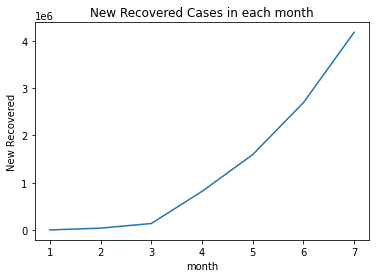

In [43]:
nr_mnth.plot(ylabel=("New Recovered"), title="New Recovered Cases in each month");

we can notice how was July remarkable for the number of recoveries by 4,186,628

In [44]:
nr_per_hr= nr_mnth / (30*24)
nr_per_hr


#nr_per_hr: number of recovered cases per hour in the whole world for each month.

month
1       0.265278
2      52.909722
3     188.555556
4    1132.697222
5    2216.629167
6    3744.263889
7    5814.761111
Name: new_recovered, dtype: float64

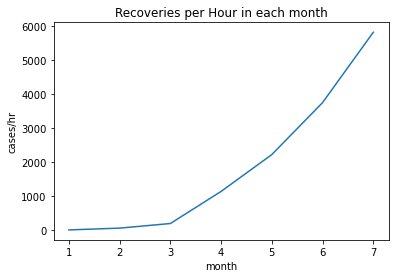

In [45]:
nr_per_hr.plot(ylabel=("cases/hr"), title=("Recoveries per Hour in each month"));

recoveries were continuouly increasing by months, we reached by the end of july 5814 recovery per hour.

### Q4: Numbers of the active Cases at the end of this period? 

In [46]:
actv_all= df[df["Date"]=="2020-07-27"].Active.sum()
actv_all

#actv_all: number of the confirmed cases that still active all around the globe.

6358362

In [47]:
actv_prcnt= actv_all/conf_all *100
actv_prcnt

#actv_prcnt: percentage of the active cases out of the whole confirmed cases.

38.533304017853034

by the end of the period, we were having 6358362 active case with  a percentage of 38.53 

In [48]:
conf_actv= df.groupby("Date")["Active"].sum()
conf_actv

#conf_actv: number of the confirmed Active cases in the whole world each day.

Date
2020-01-22        510
2020-01-23        606
2020-01-24        879
2020-01-25       1353
2020-01-26       2010
               ...   
2020-07-23    6166006
2020-07-24    6212290
2020-07-25    6243930
2020-07-26    6309711
2020-07-27    6358362
Name: Active, Length: 188, dtype: int64

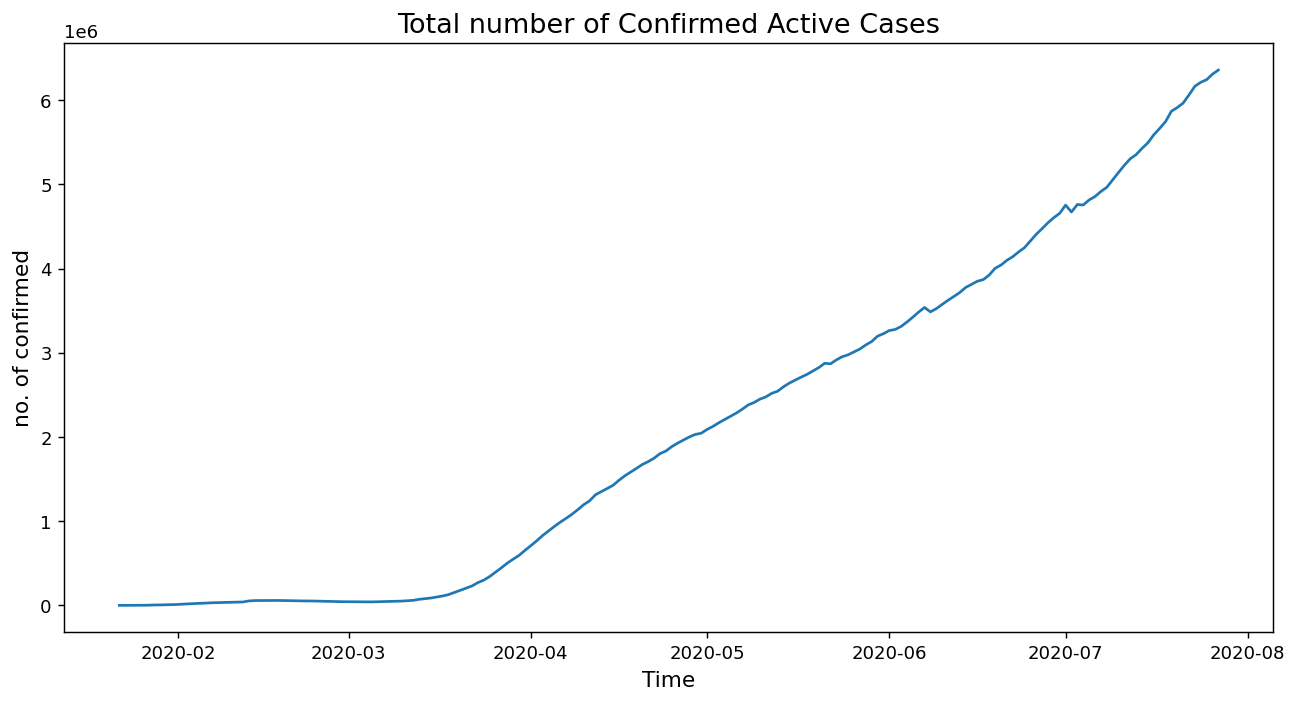

In [49]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Active Cases', fontsize=15)


plt.plot(conf_actv)


plt.show()

the graph showing how were the active cases through the whole period.

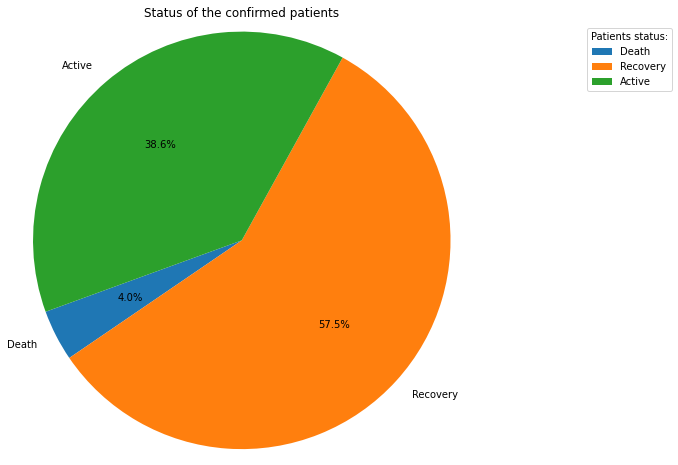

In [50]:
plt.figure(figsize=(8,8))

plt.pie([dth_all, rec_all, actv_all],labels=["Death","Recovery","Active" ],radius=1.2, startangle=200, autopct='%1.1f%%')
plt.title("Status of the confirmed patients")
plt.legend(title = "Patients status:" , loc="upper right",bbox_to_anchor =(1, 0, 0.5, 1))
plt.show()

Here we can see the Portions out of the total confirmed cases (16500952)

 6358362 active cases with a percentage of 38.53
 
 654019 Deaths with a percentage 3.96
 
 9468059 Recoveries with percentages 57.38

### Q5: How are the status in each region?

In [51]:
conf_reg= df.groupby("who_region")["new_cases"].sum().sort_values(ascending=False)
conf_reg


#conf_reg: number of the whole confirmed cases in each WHO Region.

who_region
Americas                 8842455
Europe                   3316928
South-East Asia          1835296
Eastern Mediterranean    1490854
Africa                    723540
Western Pacific           291879
Name: new_cases, dtype: int64

In [52]:
conf_reg_prcnt= conf_reg/conf_reg.sum() *100
conf_reg_prcnt

#region_cases_prcnt: regions' portion of the total cases

who_region
Americas                 53.587545
Europe                   20.101434
South-East Asia          11.122364
Eastern Mediterranean     9.034957
Africa                    4.384838
Western Pacific           1.768862
Name: new_cases, dtype: float64

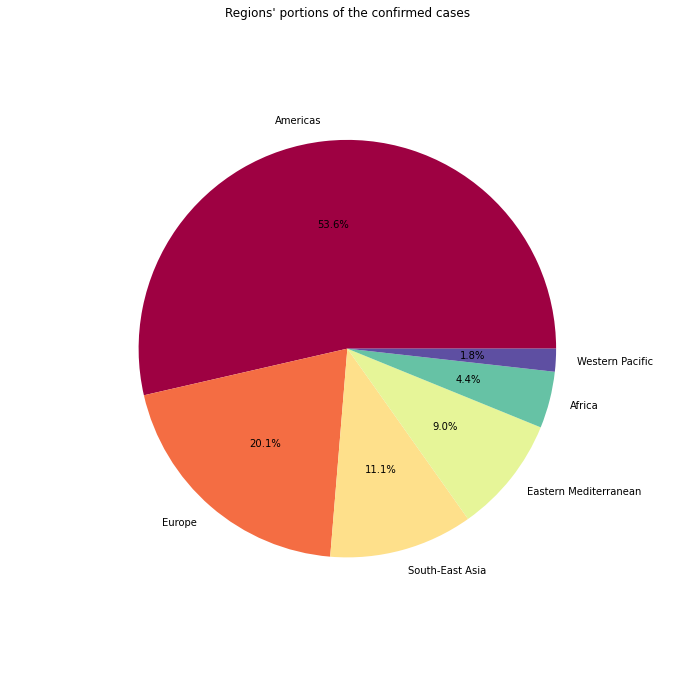

In [53]:
conf_reg.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Regions' portions of the confirmed cases", fontsize = 12)
plt.ylabel(" ");

Who Region of Americas was the region of the most confirmed cases with 8842455 cases with 53.6% out of the whole cases around the world

while region of Western Pacific was the region of the least confirmed cases with 291879 cases with 1.8% out of the whole cases around the world.

In [54]:
actv_reg= df[df["Date"]=="2020-07-27"].groupby("who_region")["Active"].sum().sort_values(ascending=False)
actv_reg

#actv_reg: total number of cases that still active in each WHO Region.

who_region
Americas                 4027938
Europe                   1094656
South-East Asia           637015
Africa                    270339
Eastern Mediterranean     251005
Western Pacific            77409
Name: Active, dtype: int64

In [55]:
actv_reg_prcnt= actv_reg/actv_reg.sum() *100
actv_reg_prcnt.sort_values(ascending=False)

#actv_reg_prcnt: regions' portion of the total Active cases.

who_region
Americas                 63.348674
Europe                   17.216006
South-East Asia          10.018539
Africa                    4.251708
Eastern Mediterranean     3.947636
Western Pacific           1.217436
Name: Active, dtype: float64

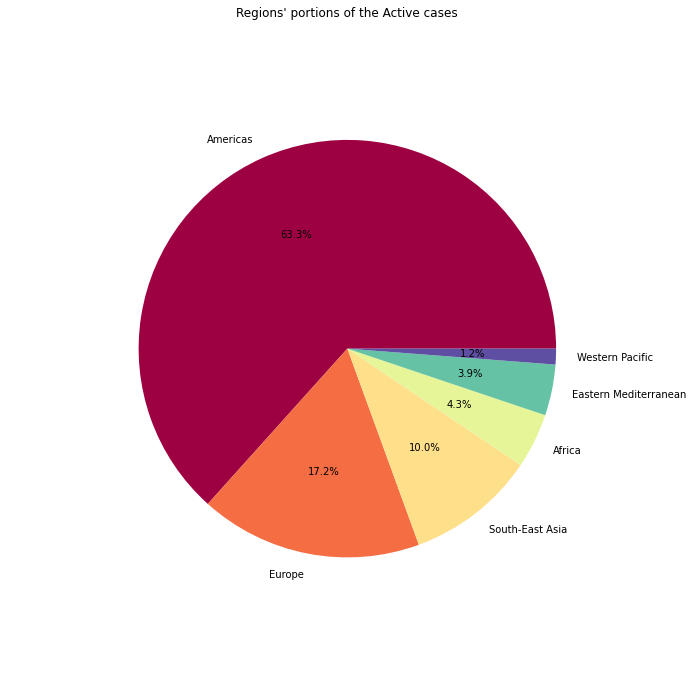

In [56]:
actv_reg.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Regions' portions of the Active cases", fontsize = 12)
plt.ylabel(" ");

Americas also had the highest number of active cases at te end of the period with 4027938 cases with 63.3% out of the whole active cases in the word.

Western Pacific Region had the least number of active cases at te end of the period with 77409 cases with 1.2% out of the whole active cases in the word.


In [57]:
dth_reg= df.groupby("who_region")["new_death"].sum()
dth_reg

#dth_reg: number of the whole confirmed deaths in each WHO Region.

who_region
Africa                    12223
Americas                 342732
Eastern Mediterranean     38339
Europe                   211144
South-East Asia           41349
Western Pacific            8232
Name: new_death, dtype: int64

In [58]:
dth_reg_prcnt= dth_reg/dth_reg.sum() *100
dth_reg_prcnt.sort_values(ascending=False)

#region_actv_prcnt: regions' portion of the total confirmed Deaths around the world.

who_region
Americas                 52.403982
Europe                   32.284077
South-East Asia           6.322293
Eastern Mediterranean     5.862062
Africa                    1.868906
Western Pacific           1.258679
Name: new_death, dtype: float64

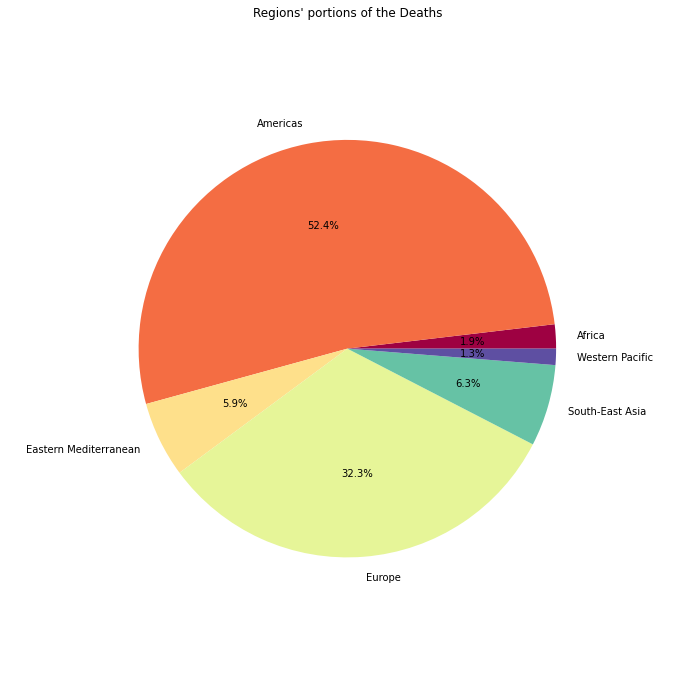

In [59]:
dth_reg.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Regions' portions of the Deaths", fontsize = 12)
plt.ylabel(" ");

Americas had the highest number of deaths at the end of the period with 342732  cases with 52.4% out of the whole Deaths in the word.

Western Pacific had the least number of deaths at te end of the period with 8232 cases with 1.3% out of the whole deaths in the word.


In [60]:
rec_reg= df.groupby("who_region")["new_recovered"].sum().sort_values(ascending=False)
rec_reg

#rec_reg: number of the whole confirmed recovered cases in each WHO Region.

who_region
Americas                 4468616
Europe                   1993723
Eastern Mediterranean    1201400
South-East Asia          1156933
Africa                    440645
Western Pacific           206742
Name: new_recovered, dtype: int64

In [61]:
rec_reg_prcnt= rec_reg/rec_reg.sum() *100
rec_reg_prcnt.sort_values(ascending=False)

#rec_reg_prcnt: regions' portion of the total confirmed recovered cases around the world.

who_region
Americas                 47.196749
Europe                   21.057357
Eastern Mediterranean    12.688979
South-East Asia          12.219326
Africa                    4.654016
Western Pacific           2.183573
Name: new_recovered, dtype: float64

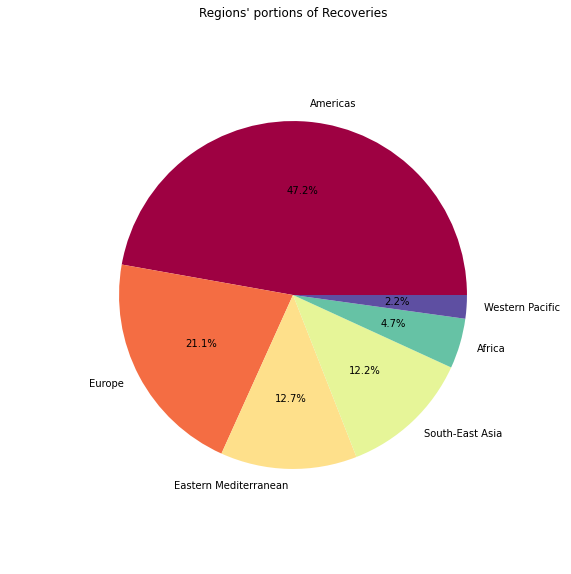

In [62]:
rec_reg.plot(kind="pie",radius=.8, figsize=(10,10),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Regions' portions of Recoveries", fontsize = 12)
plt.ylabel(" ");

Americas had the highest number of recoveries at the end of the period with 4468616  cases with 47.2% out of the whole recoveries in the world.

Western Pacific had the least number of recoveries at te end of the period with 206742 cases with 2.2% out of the whole recoveries in the world.


In [63]:
region_dth_prcnt= dth_reg / conf_reg *100
region_dth_prcnt.sort_values(ascending=False)

#region_dth_prcnt: percentage of deaths out of the the confirmed cases in each region.

who_region
Europe                   6.365649
Americas                 3.875982
Western Pacific          2.820347
Eastern Mediterranean    2.571613
South-East Asia          2.252988
Africa                   1.689333
dtype: float64

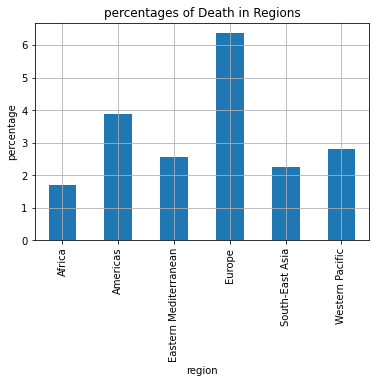

In [64]:
region_dth_prcnt.plot(kind="bar", grid=True)
plt.xlabel("region")
plt.ylabel("percentage")
plt.title("percentages of Death in Regions");

Here we can see the percentages of death out of cases in each region

**Europe** has the highest death ratio with 6.37%

while **Africa** has the lowest death ratio with 1.69%.

In [65]:
region_rec_prcnt= rec_reg/ conf_reg  *100
region_rec_prcnt.sort_values(ascending=False)

#region_rec_prcnt: percentage of recoveries out of the the confirmed cases in each region.

who_region
Eastern Mediterranean    80.584685
Western Pacific          70.831406
South-East Asia          63.037951
Africa                   60.901263
Europe                   60.107515
Americas                 50.535920
dtype: float64

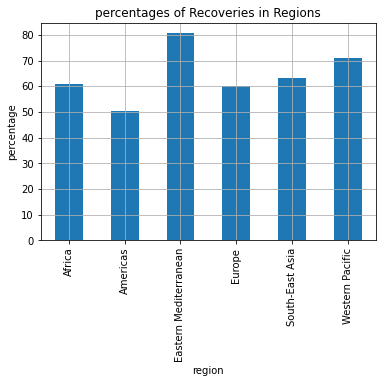

In [66]:
region_rec_prcnt.plot(kind="bar", grid=True)
plt.xlabel("region")
plt.ylabel("percentage")
plt.title("percentages of Recoveries in Regions");

**Eastern Mediterranean** has the highest Recovery percentage out of it's whole cases with 80.58%

**Americas** has the lowest ratio with 50.54%

In [67]:
region_actv_prcnt= actv_reg/conf_reg *100
region_actv_prcnt.sort_values(ascending=False)

#region_actv_prcnt: percentage of Active cases out of the the confirmed cases in each region.

who_region
Americas                 45.552259
Africa                   37.363380
South-East Asia          34.709115
Europe                   33.002103
Western Pacific          26.520921
Eastern Mediterranean    16.836323
dtype: float64

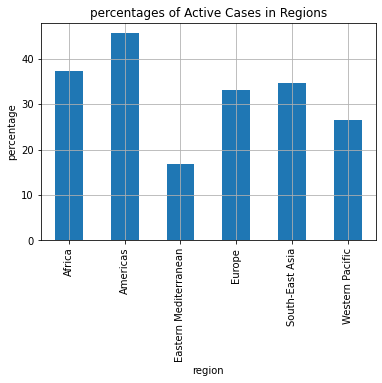

In [68]:
region_actv_prcnt.plot(kind="bar", grid=True)
plt.xlabel("region")
plt.ylabel("percentage")
plt.title("percentages of Active Cases in Regions");

**Eastern Mediterranean** has the lowest percentage of active cases out of the whole cases of the region with 16.84%

while **Americas** has the highest percentage 45.55%

### Q6: How was the Eastern Mediterranean region facing the Virus?

we find that the region of the Eastern Mediterranean has the less percentage of the active cases in it's cases, 
and the highest percentage of recovery in it's cases, 
it also has low death percentage in it's cases.

let's go in a deeper investigation for this region.

In [69]:
conf_estmed= df_estmed.new_cases.sum()
conf_estmed

#conf_estmed: total number of the whole confirmed cases in the Eastern Mediterranean.

1490854

the number of the confirmed cases in the Eastern Mediterranean was 1490854 cases

In [70]:
conf_cases_estmed= df_estmed.groupby("Date")["Confirmed"].sum()
conf_cases_estmed

#conf_cases_estmed: number of the confirmed cases for each day in the Eastern Mediterranean.

Date
2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0
               ...   
2020-07-23    1439937
2020-07-24    1453830
2020-07-25    1467209
2020-07-26    1478334
2020-07-27    1490744
Name: Confirmed, Length: 188, dtype: int64

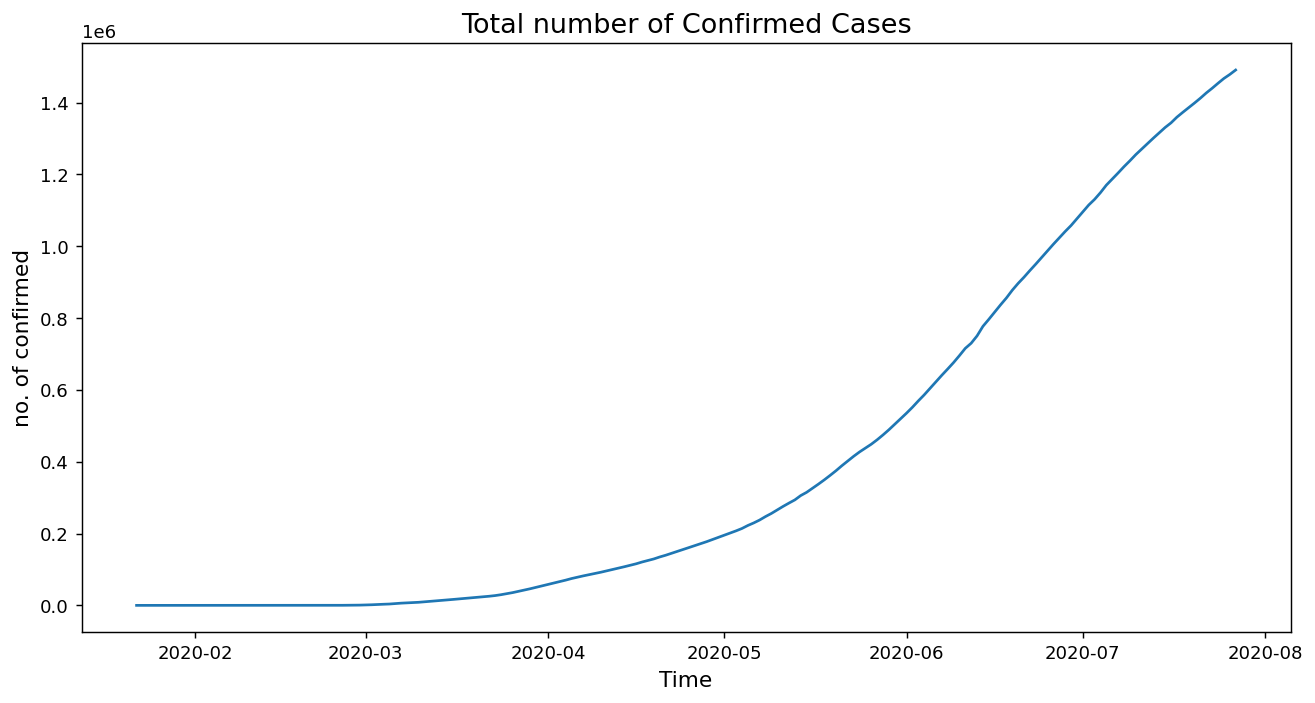

In [71]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Cases', fontsize=15)


plt.plot(conf_cases_estmed)


plt.show()

The graph shows how the number of cases increased through the time

In [72]:
nc_estmed= df_estmed.groupby("Date")["new_cases"].sum()
nc_estmed

#nc_estmed: total number of the new cases of each day for the Eastern Mediterranean.

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-23    13083
2020-07-24    13893
2020-07-25    13379
2020-07-26    11125
2020-07-27    12410
Name: new_cases, Length: 188, dtype: int64

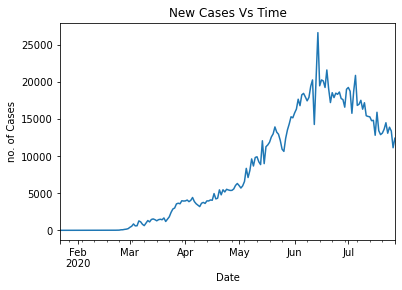

In [73]:
nc_estmed.plot(title="New Cases Vs Time", ylabel="no. of Cases");

and here we can notice how the was number of new cases in each day along the whole period.

In [74]:
nc_estmed_mnth=nc_mnth = df_estmed.groupby("month")["new_cases"].sum()
nc_estmed_mnth

#nc_estmed_mnth: number of the whole new cases for each month in the East Mediterranean.

month
1         4
2       726
3     53563
4    135490
5    329626
6    557430
7    414015
Name: new_cases, dtype: int64

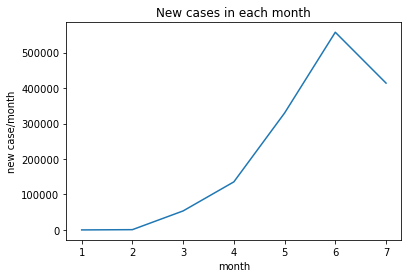

In [75]:
nc_estmed_mnth.plot(ylabel=("new case/month"), title="New cases in each month");

June was the month of the peak of the new cases with 557430 cases.

In [76]:
nc_estmed_per_hr= nc_estmed_mnth /(30*24)
nc_estmed_per_hr

#nc_estmed_per_hr: number of new cases per hour in the Mediterranean for each month.

month
1      0.005556
2      1.008333
3     74.393056
4    188.180556
5    457.813889
6    774.208333
7    575.020833
Name: new_cases, dtype: float64

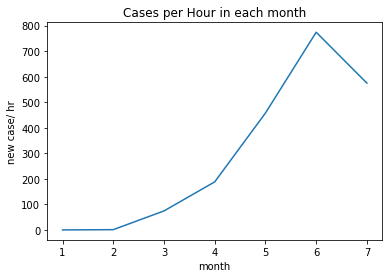

In [77]:
nc_estmed_per_hr.plot(ylabel=("new case/ hr"), title="Cases per Hour in each month");

June was on the top as there were 774 new case per hour in the eastern Mediterranean.

In [78]:
dth_estmed_all= df_estmed.new_death.sum()
dth_estmed_all

#dth_estmed_all: number of the whole confirmed deaths in the Eastern Mediterranean.

38339

In [79]:
dth_estmed_prcnt= dth_estmed_all/conf_estmed *100
dth_estmed_prcnt

#dth_estmed_prcnt: percentage of Deaths out in the Eastern Mediterranean.

2.571613316931101

the Eastern Mediterranean had 38339 Deaths with 2.57% of the whole cases in the region.

In [80]:
conf_estmed_dth= df_estmed.groupby("Date")["Deaths"].sum()
conf_estmed_dth

#conf_estmed_dth: number of the confirmed Deaths in the Eastern Mediterranean each day.

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-23    36575
2020-07-24    37033
2020-07-25    37467
2020-07-26    37894
2020-07-27    38339
Name: Deaths, Length: 188, dtype: int64

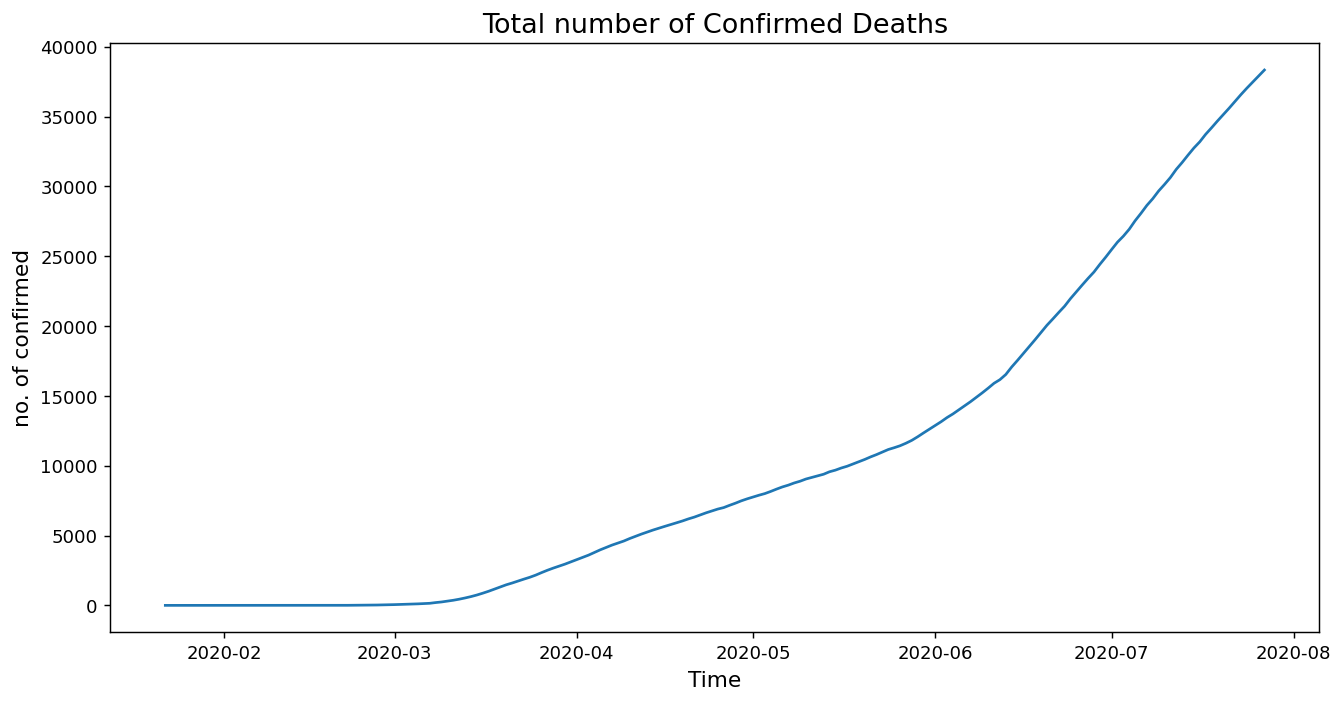

In [81]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Deaths', fontsize=15)


plt.plot(conf_estmed_dth)


plt.show()

and here we can see how the deaths increased through the whole period.

In [82]:
nd_estmed= df_estmed.groupby("Date")["new_death"].sum()
nd_estmed

#nd_estmed: total number of the new Deaths of each day for the Eastern Mediterranean.

Date
2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
             ... 
2020-07-23    482
2020-07-24    458
2020-07-25    434
2020-07-26    427
2020-07-27    445
Name: new_death, Length: 188, dtype: int64

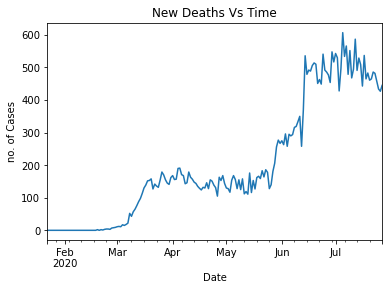

In [83]:
nd_estmed.plot(title="New Deaths Vs Time", ylabel="no. of Cases");

by the end of June we notice how have the Deaths increased in the region.

In [84]:
nd_estmed_mnth = df_estmed.groupby("month")["new_death"].sum()
nd_estmed_mnth

#nd_estmed_mnth: total number of the new Deaths of each month for the Eastern Mediterranean.

month
1        0
2       43
3     3073
4     4514
5     4986
6    12322
7    13401
Name: new_death, dtype: int64

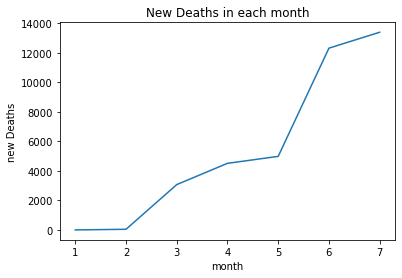

In [85]:
nd_estmed_mnth.plot(ylabel=("new Deaths"), title="New Deaths in each month");

The graph shows how the number of deaths increased and how was that remarkable increasing started by May.

In [86]:
nd_estmed_per_hr= nd_estmed_mnth /(30*24)
nd_estmed_per_hr

#nd_estmed_per_hr: number of deaths per hour in the whole world for each month.

month
1     0.000000
2     0.059722
3     4.268056
4     6.269444
5     6.925000
6    17.113889
7    18.612500
Name: new_death, dtype: float64

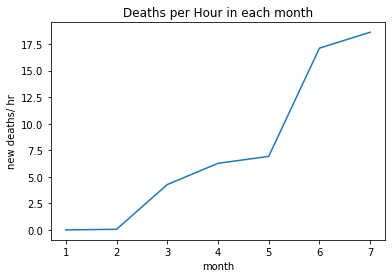

In [87]:
nd_estmed_per_hr.plot(ylabel=("new deaths/ hr"), title="Deaths per Hour in each month");

by June the region were facing 19 deaths per hour.

In [88]:
rec_estmed= df_estmed.new_recovered.sum()
rec_estmed

#rec_estmed: number of the whole confirmed recovered Cases in the Eastern Mediterranean.

1201400

In [89]:
rec_estmed_prcnt= rec_estmed/conf_estmed *100
rec_estmed_prcnt

#rec_estmed_prcnt: percentage of the recovered cases out of the Eastern Mediterranean.

80.58468501945865

th Eastern Mediterranean  had 1201400 recoveries with 80.58% out of the whole cases in the region.

In [90]:
conf_estmed_rec= df_estmed.groupby("Date")["Recovered"].sum()
conf_estmed_rec

#conf_estmed_rec: number of the confirmed recovered cases in the Mediterranean each day.

Date
2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0
               ...   
2020-07-23    1135286
2020-07-24    1163013
2020-07-25    1174853
2020-07-26    1186557
2020-07-27    1201400
Name: Recovered, Length: 188, dtype: int64

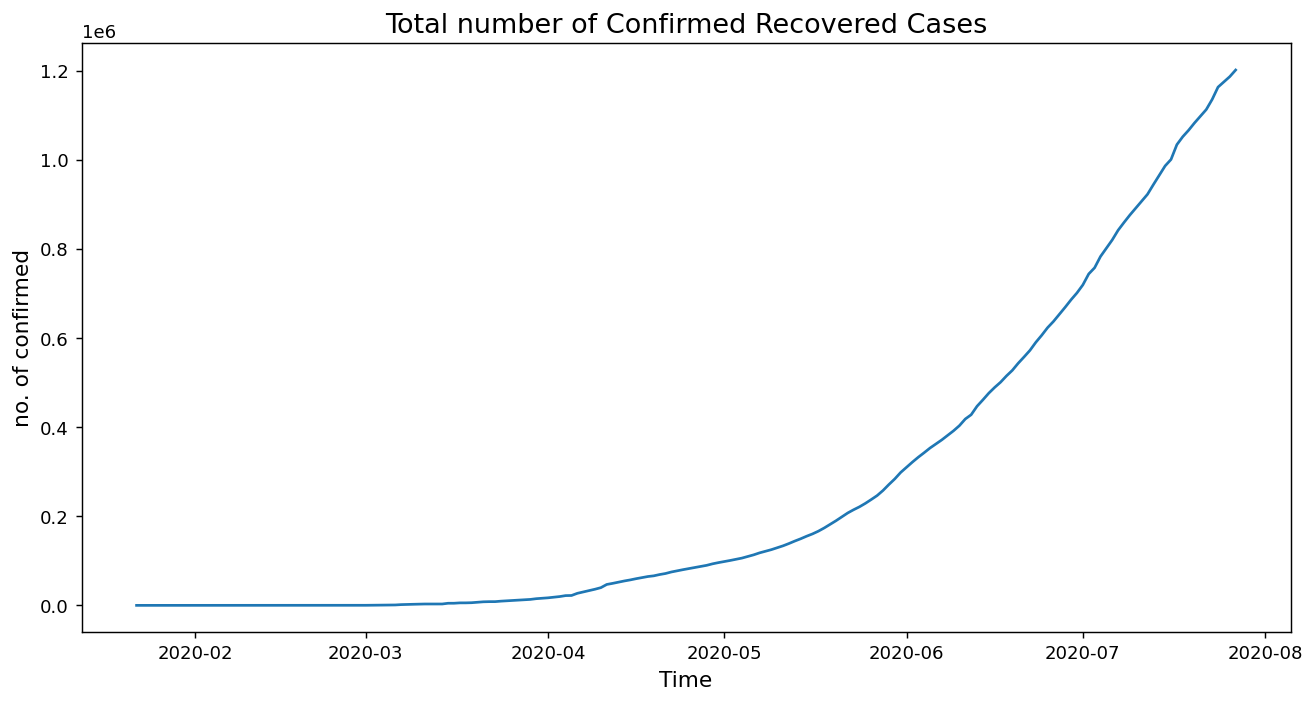

In [91]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Recovered Cases', fontsize=15)


plt.plot(conf_estmed_rec)


plt.show()

we can see distribution of recoveries by time in the region

In [92]:
nr_estmed= df_estmed.groupby("Date")["new_recovered"].sum()
nr_estmed

#nr_estmed: total number of the new recovered cases of each day for the Eastern Mediterranean.

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-23    22586
2020-07-24    27727
2020-07-25    11840
2020-07-26    11704
2020-07-27    14843
Name: new_recovered, Length: 188, dtype: int64

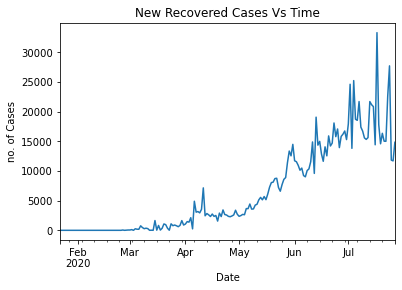

In [93]:
nr_estmed.plot(title="New Recovered Cases Vs Time", ylabel="no. of Cases");

we can notice the new recoveries day by day through the whole period.

In [94]:
nr_estmed_mnth = df_estmed.groupby("month")["new_recovered"].sum()
nr_estmed_mnth

#nr_estmed_mnth: total number of the new recovered cases of each month for the Eastern Mediterranean.

month
1         0
2       130
3     15757
4     80053
5    202283
6    402982
7    500195
Name: new_recovered, dtype: int64

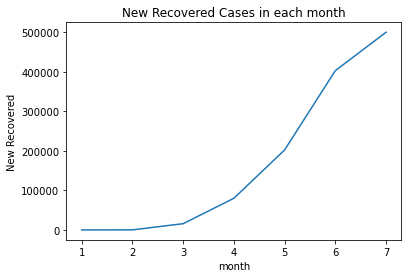

In [95]:
nr_estmed_mnth.plot(ylabel=("New Recovered"), title="New Recovered Cases in each month");

recoveries were in a continuous increasing through the period, it;s reached to 500195 cases by the end of July

In [96]:
nr_estmed_per_hr= nr_estmed_mnth / (30*24)
nr_estmed_per_hr


#nr_estmed_per_hr: number of recovered cases per hour in the Eastern Mediterranean for each month.

month
1      0.000000
2      0.180556
3     21.884722
4    111.184722
5    280.948611
6    559.697222
7    694.715278
Name: new_recovered, dtype: float64

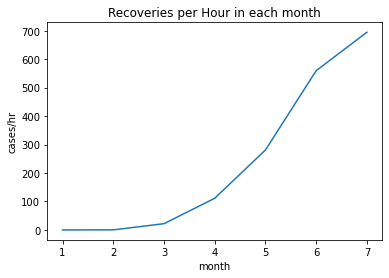

In [97]:
nr_estmed_per_hr.plot(ylabel=("cases/hr"), title=("Recoveries per Hour in each month"));

it was promising to reach to 695 recoveries per hour in the region by the end of July.

In [98]:
actv_estmed= df_estmed[df_estmed["Date"]=="2020-07-27"].Active.sum()
actv_estmed

#actv_estmed: number of the confirmed cases that still active in the Eastern Mediterranean.

251005

In [99]:
actv_estmed_prcnt= actv_estmed/conf_estmed *100
actv_estmed_prcnt

#actv_estmed_prcnt: percentage of the active cases out of the whole confirmed cases in the Eastern Mediterranean.

16.836323342191793

by the end of the period, the region were having 251005 case still active, with 16.84% out of the whole cases in the region.

In [100]:
conf_estmed_actv= df_estmed.groupby("Date")["Active"].sum()
conf_estmed_actv

#conf_estmed_actv: number of the confirmed Active cases in the Eastern Mediterranean each day.

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-07-23    268076
2020-07-24    253784
2020-07-25    254889
2020-07-26    253883
2020-07-27    251005
Name: Active, Length: 188, dtype: int64

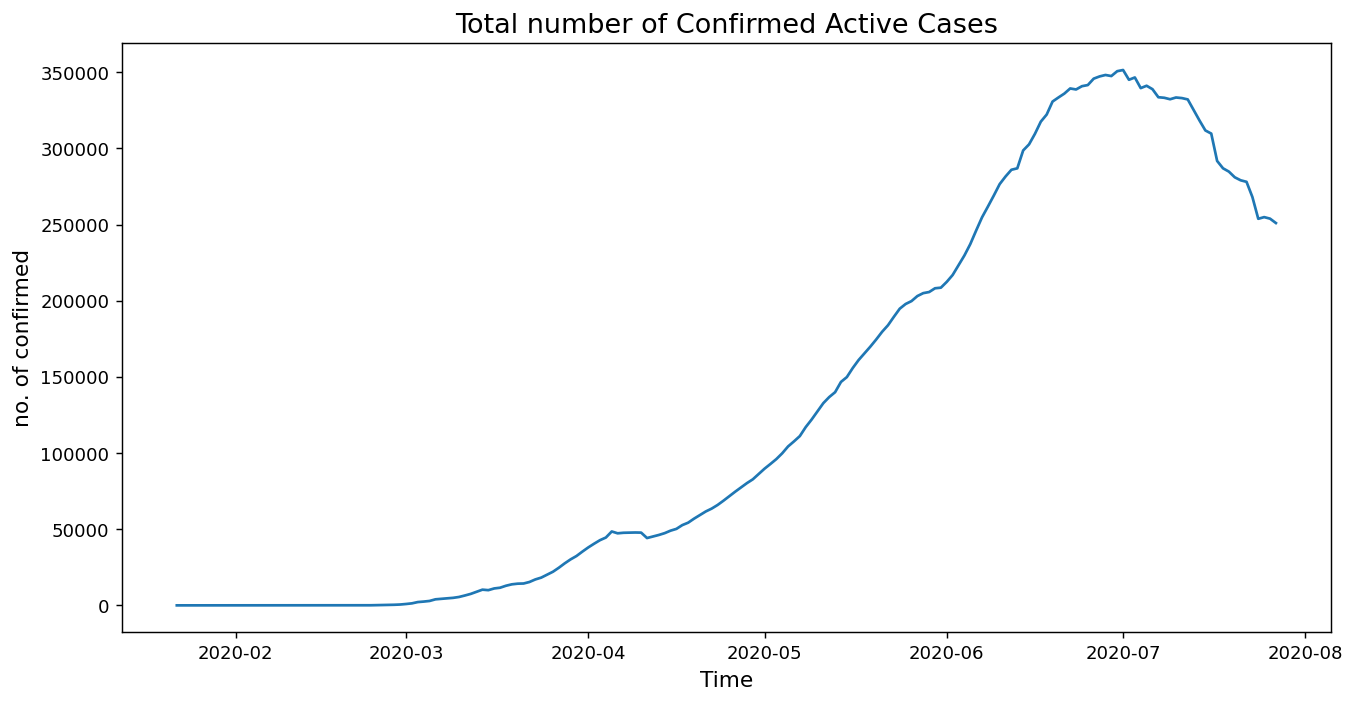

In [101]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Active Cases', fontsize=15)


plt.plot(conf_estmed_actv)


plt.show()

it's shown that the number of active cases have been reduced after being at it's oeak by the end of June to end the period with 251005 an active cases. 

#### more details about the countries of the region

In [102]:
conf_cntry= df_estmed.groupby("country")["new_cases"].sum().sort_values(ascending=False)
conf_cntry


#conf_cntry: number of the whole confirmed cases in each country in the Eastern Mediterranean.

country
Iran                    293606
Pakistan                274289
Saudi Arabia            268934
Iraq                    112585
Qatar                   109597
Egypt                    92482
Oman                     77058
Kuwait                   64379
United Arab Emirates     59177
Bahrain                  39482
Afghanistan              36263
Morocco                  20887
Sudan                    11424
Palestine                10621
Djibouti                  5059
Lebanon                   3882
Somalia                   3196
Libya                     2827
Yemen                     1691
Tunisia                   1455
Jordan                    1286
Syria                      674
Name: new_cases, dtype: int64

In [103]:
conf_cntry_prcnt= conf_cntry/conf_cntry.sum() *100
conf_cntry_prcnt

#conf_cntry_prcnt: country's portions of the total cases in the region.

country
Iran                    19.693813
Pakistan                18.398113
Saudi Arabia            18.038923
Iraq                     7.551712
Qatar                    7.351290
Egypt                    6.203290
Oman                     5.168715
Kuwait                   4.318263
United Arab Emirates     3.969336
Bahrain                  2.648281
Afghanistan              2.432364
Morocco                  1.401009
Sudan                    0.766272
Palestine                0.712410
Djibouti                 0.339336
Lebanon                  0.260388
Somalia                  0.214374
Libya                    0.189623
Yemen                    0.113425
Tunisia                  0.097595
Jordan                   0.086259
Syria                    0.045209
Name: new_cases, dtype: float64

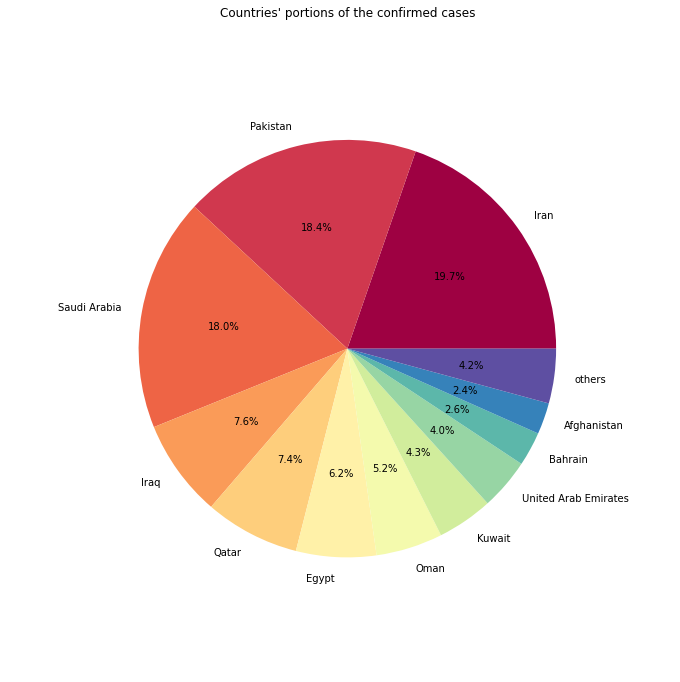

In [104]:
conf_cntry_prcnts= conf_cntry_prcnt.iloc[:11]
other = conf_cntry_prcnt.iloc[11:].sum()
conf_cntry_prcnts["others"]= other

conf_cntry_prcnts.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Countries' portions of the confirmed cases", fontsize = 12)
plt.ylabel(" ");

Here we can see the countries' Portions of the cases in the region,

Iran had the highest number of cases 293606 cases with 19.7% of the cases in the region.

Pakistan comes second with 274289 cases with 18.4%

Saudi Arabia comes third with 268934 cases with 18% 

Syria comes last with just 674 confirmed cases with 0.045%

In [105]:
actv_cntry= df_estmed[df_estmed["Date"]=="2020-07-27"].groupby("country")["Active"].sum().sort_values(ascending=False)
actv_cntry

#actv_cntry: total number of cases that still active in each country in the region.

country
Egypt                   52992
Saudi Arabia            43238
Iraq                    30983
Pakistan                27421
Iran                    22550
Oman                    19637
Afghanistan              9796
Kuwait                   8884
Palestine                6791
United Arab Emirates     6322
Sudan                    4765
Morocco                  4018
Bahrain                  3231
Qatar                    3104
Libya                    2186
Lebanon                  2122
Somalia                  1560
Syria                     634
Yemen                     375
Tunisia                   248
Jordan                    124
Djibouti                   24
Name: Active, dtype: int64

In [106]:
actv_cntry_prcnt= actv_cntry/actv_cntry.sum() *100
actv_cntry_prcnt.sort_values(ascending=False)

#actv_cntry_prcnt: countries' portion of the total Active cases in the region.

country
Egypt                   21.111930
Saudi Arabia            17.225952
Iraq                    12.343579
Pakistan                10.924484
Iran                     8.983885
Oman                     7.823350
Afghanistan              3.902711
Kuwait                   3.539372
Palestine                2.705524
United Arab Emirates     2.518675
Sudan                    1.898369
Morocco                  1.600765
Bahrain                  1.287225
Qatar                    1.236629
Libya                    0.870899
Lebanon                  0.845401
Somalia                  0.621502
Syria                    0.252585
Yemen                    0.149399
Tunisia                  0.098803
Jordan                   0.049401
Djibouti                 0.009562
Name: Active, dtype: float64

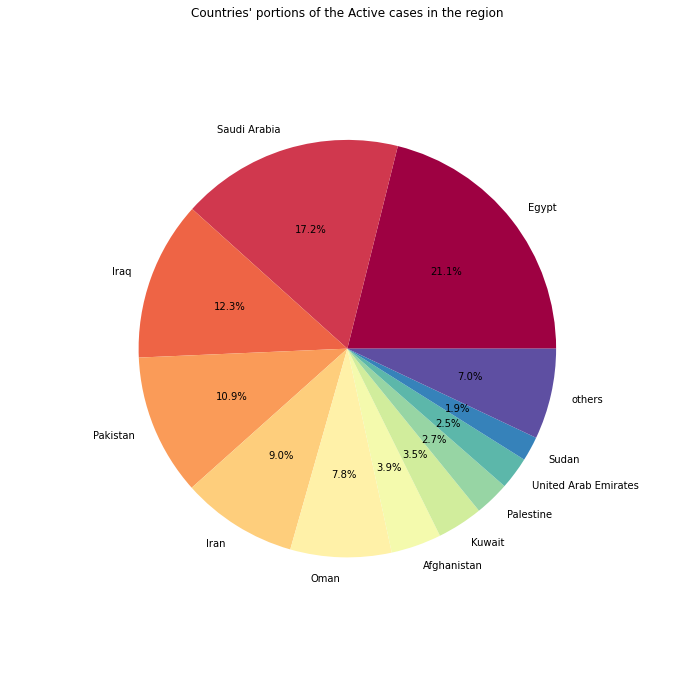

In [107]:
actv_cntry_prcnts= actv_cntry_prcnt.iloc[:11]
other = actv_cntry_prcnt.iloc[11:].sum()
actv_cntry_prcnts["others"]= other

actv_cntry_prcnts.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Countries' portions of the Active cases in the region", fontsize = 12)
plt.ylabel(" ");

Here we can see the countries' Portions of the Active cases in the region,

Egypt had the highest number of cases 52992 cases with 21.1% of the cases in the region.

saudi Arabia comes second with 43238 cases with 17.2%

Djibouti comes last with just 24 active cases with 0.0095%

In [108]:
dth_cntry= df_estmed.groupby("country")["new_death"].sum()
dth_cntry.sort_values(ascending=False)

#dth_cntry: number of the whole confirmed deaths in each country in the Region.

country
Iran                    15912
Pakistan                 5842
Egypt                    4652
Iraq                     4458
Saudi Arabia             2760
Afghanistan              1269
Sudan                     720
Yemen                     483
Kuwait                    438
Oman                      393
United Arab Emirates      345
Morocco                   316
Qatar                     165
Bahrain                   141
Somalia                    93
Palestine                  78
Libya                      64
Djibouti                   58
Lebanon                    51
Tunisia                    50
Syria                      40
Jordan                     11
Name: new_death, dtype: int64

In [109]:
dth_cntry_prcnt= dth_cntry/dth_cntry.sum() *100
dth_cntry_prcnt.sort_values(ascending=False)

#dth_cntry_prcnt: countries' portion of the total confirmed Deaths in the region.

country
Iran                    41.503430
Pakistan                15.237747
Egypt                   12.133858
Iraq                    11.627846
Saudi Arabia             7.198936
Afghanistan              3.309945
Sudan                    1.877983
Yemen                    1.259814
Kuwait                   1.142440
Oman                     1.025066
United Arab Emirates     0.899867
Morocco                  0.824226
Qatar                    0.430371
Bahrain                  0.367772
Somalia                  0.242573
Palestine                0.203448
Libya                    0.166932
Djibouti                 0.151282
Lebanon                  0.133024
Tunisia                  0.130416
Syria                    0.104332
Jordan                   0.028691
Name: new_death, dtype: float64

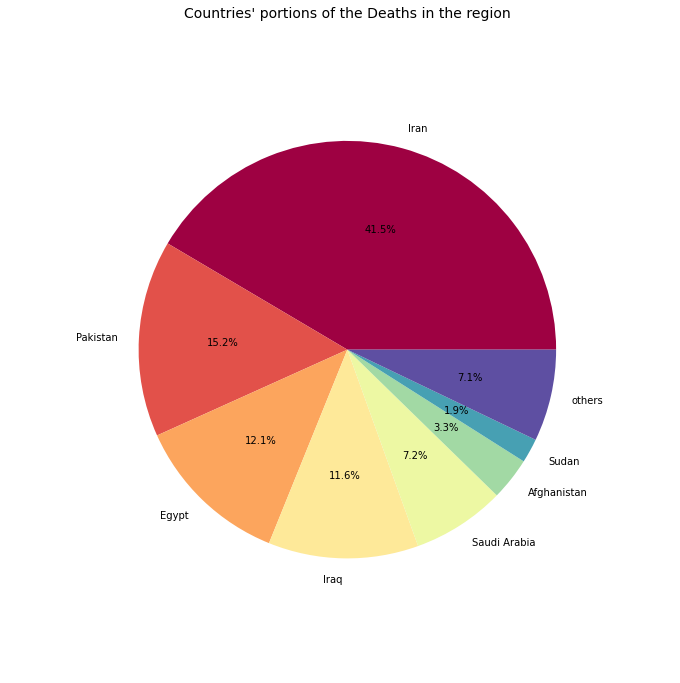

In [110]:
dth_cntry_prcnts= dth_cntry_prcnt.sort_values(ascending=False).iloc[:7]
others = dth_cntry_prcnt.sort_values(ascending=False).iloc[7:].sum()
dth_cntry_prcnts["others"]= others

dth_cntry_prcnts.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Countries' portions of the Deaths in the region", fontsize = 14)
plt.ylabel(" ");

Here we can see the countries' Portions of the Deaths in the region,

Iran had the highest number of deaths 15912 deaths with 41.5% of the Deaths in the region.

Pakistan comes second with 5842 deaths with 15.2%

Egypt comes third with 4652 deaths with 12.1% 

Jordan comes last with just 11 deaths with 0.029%

In [111]:
rec_cntry= df_estmed.groupby("country")["new_recovered"].sum().sort_values(ascending=False)
rec_cntry

#rec_cntry: number of the whole confirmed recovered cases in each country in the Region.

country
Iran                    255144
Pakistan                241026
Saudi Arabia            222936
Qatar                   106328
Iraq                     77144
Oman                     57028
Kuwait                   55057
United Arab Emirates     52510
Bahrain                  36110
Egypt                    34838
Afghanistan              25198
Morocco                  16553
Sudan                     5939
Djibouti                  4977
Palestine                 3752
Lebanon                   1709
Somalia                   1543
Tunisia                   1157
Jordan                    1041
Yemen                      833
Libya                      577
Syria                        0
Name: new_recovered, dtype: int64

In [112]:
rec_cntry_prcnt= rec_cntry/rec_cntry.sum() *100
rec_cntry_prcnt

#rec_cntry_prcnt: regions' portion of the total confirmed recovered cases in each country in the region.

country
Iran                    21.237223
Pakistan                20.062094
Saudi Arabia            18.556351
Qatar                    8.850341
Iraq                     6.421175
Oman                     4.746795
Kuwait                   4.582737
United Arab Emirates     4.370734
Bahrain                  3.005660
Egypt                    2.899784
Afghanistan              2.097386
Morocco                  1.377809
Sudan                    0.494340
Djibouti                 0.414267
Palestine                0.312302
Lebanon                  0.142251
Somalia                  0.128433
Tunisia                  0.096304
Jordan                   0.086649
Yemen                    0.069336
Libya                    0.048027
Syria                    0.000000
Name: new_recovered, dtype: float64

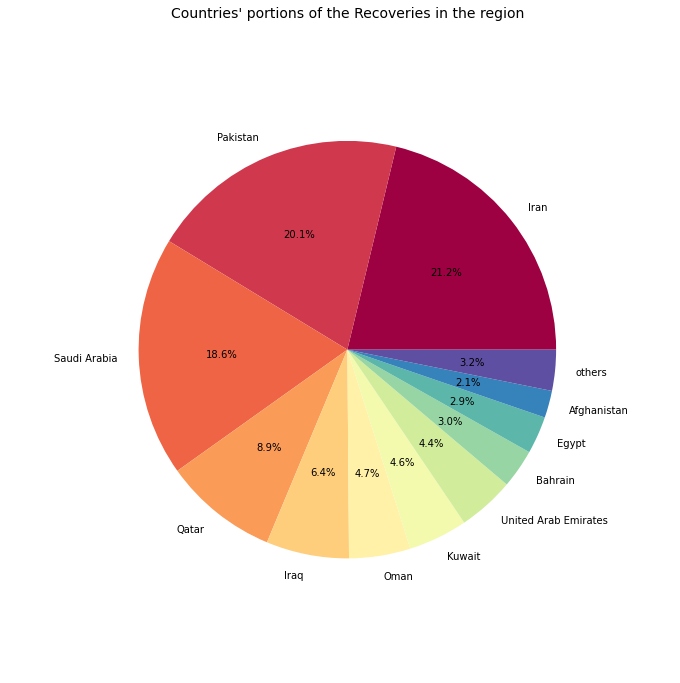

In [113]:
rec_cntry_prcnts= rec_cntry_prcnt.sort_values(ascending=False).iloc[:11]
otherz = rec_cntry_prcnt.sort_values(ascending=False).iloc[11:].sum()
rec_cntry_prcnts["others"]= otherz

rec_cntry_prcnts.plot(kind="pie",radius=.8, figsize=(12,12),startangle=0, fontsize=10, autopct='%1.1f%%',cmap = 'Spectral')
plt.title("Countries' portions of the Recoveries in the region", fontsize = 14)
plt.ylabel(" ");

Here we can see the countries' Portions of the Recoveries in the region,

Iran had the highest number of recoveries 255144 cases with 21.2% of the recovery cases in the region.

Pakistan comes second with 241026 cases with 20.1%

Saudi Arabia comes third with 222936 cases with 18.6% 

Jordan comes last with just 0 cases with 0% ( there is no provided data about recoveries come out of Syria)

In [114]:
cntry_dth_prcnt= dth_cntry / conf_cntry *100
cntry_dth_prcnt.sort_values(ascending=False)

#cntry_dth_prcnt: percentage of deaths out of the the confirmed cases in each country.

country
Yemen                   28.562980
Sudan                    6.302521
Syria                    5.934718
Iran                     5.419508
Egypt                    5.030168
Iraq                     3.959675
Afghanistan              3.499435
Tunisia                  3.436426
Somalia                  2.909887
Libya                    2.263884
Pakistan                 2.129870
Morocco                  1.512903
Lebanon                  1.313756
Djibouti                 1.146472
Saudi Arabia             1.026274
Jordan                   0.855365
Palestine                0.734394
Kuwait                   0.680346
United Arab Emirates     0.582997
Oman                     0.510005
Bahrain                  0.357125
Qatar                    0.150552
dtype: float64

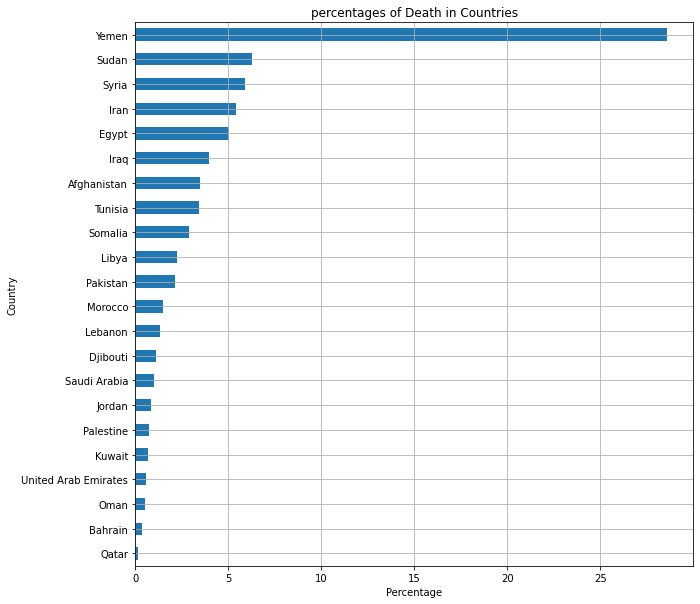

In [115]:
cntry_dth_prcnt.sort_values(ascending=True).plot(kind="barh", grid=True, figsize=(10,10))
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.title("percentages of Death in Countries");

Here we can see the percentage of deaths out of cases in each country in the region, 

**Yemen** has the highest percentage 28.56%,
then **Sudan** with 6.3%

while **Qatar** has the lowest percentage 0.15%

In [116]:
cntry_rec_prcnt= rec_cntry/ conf_cntry  *100
cntry_rec_prcnt.sort_values(ascending=False)

#cntry_rec_prcnt: percentage of recoveries out of the the confirmed cases in each country.

country
Djibouti                98.379126
Qatar                   97.017254
Bahrain                 91.459399
United Arab Emirates    88.733799
Pakistan                87.873010
Iran                    86.900131
Kuwait                  85.520123
Saudi Arabia            82.896175
Jordan                  80.948678
Tunisia                 79.518900
Morocco                 79.250251
Oman                    74.006592
Afghanistan             69.486805
Iraq                    68.520673
Sudan                   51.987045
Yemen                   49.260792
Somalia                 48.279099
Lebanon                 44.023699
Egypt                   37.670033
Palestine               35.326240
Libya                   20.410329
Syria                    0.000000
dtype: float64

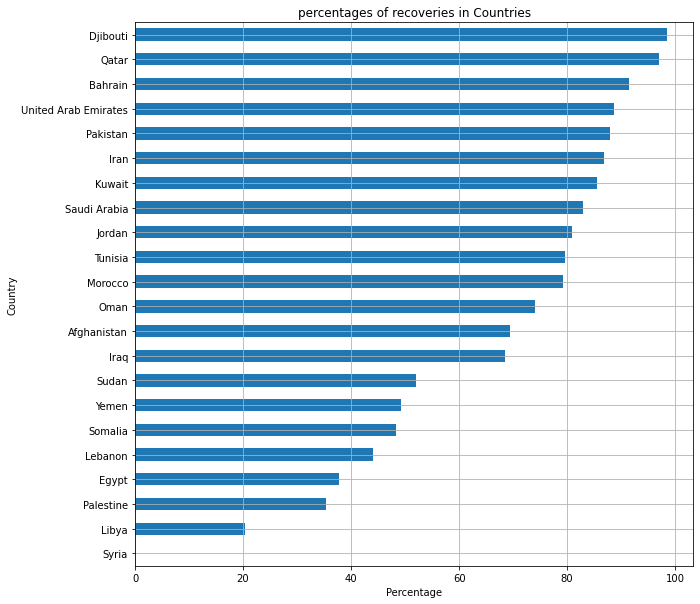

In [117]:
cntry_rec_prcnt.sort_values(ascending=True).plot(kind="barh", grid=True, figsize=(10,10))
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.title("percentages of recoveries in Countries");

Here we can see the percentage of Recoveries out of cases in each country in the region, 

**Djibouti** has the highest percentage 98.37%,
then **Qatar** with 97.02%

while **libya** has the lowest percentage 20.41%


* Syria's data here is neglected as we don't have data about recoveries there

In [118]:
cntry_actv_prcnt= actv_cntry/conf_cntry *100
cntry_actv_prcnt.sort_values(ascending=False)

#cntry_actv_prcnt: percentage of Active cases out of the the confirmed cases in each Country.

country
Syria                   94.065282
Libya                   77.325787
Palestine               63.939365
Egypt                   57.299799
Lebanon                 54.662545
Somalia                 48.811014
Sudan                   41.710434
Iraq                    27.519652
Afghanistan             27.013761
Oman                    25.483402
Yemen                   22.176227
Morocco                 19.236846
Tunisia                 17.044674
Saudi Arabia            16.077551
Kuwait                  13.799531
United Arab Emirates    10.683205
Pakistan                 9.997120
Jordan                   9.642302
Bahrain                  8.183476
Iran                     7.680361
Qatar                    2.832194
Djibouti                 0.474402
dtype: float64

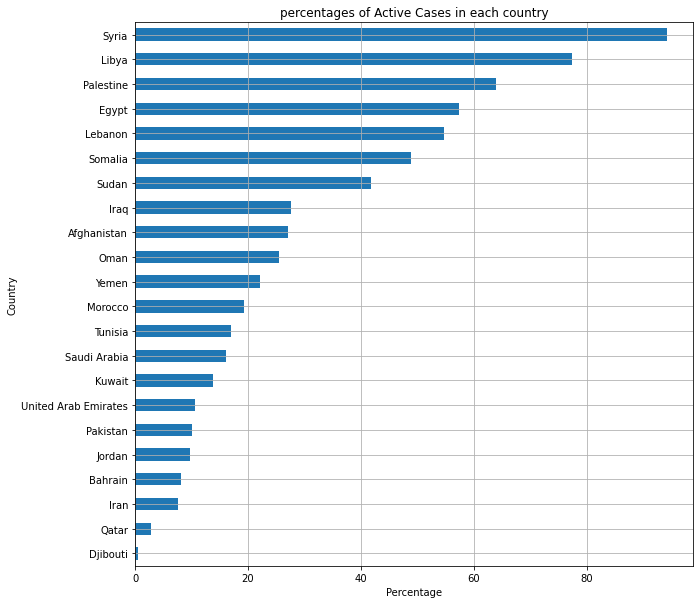

In [119]:
cntry_actv_prcnt.sort_values(ascending=True).plot(kind="barh", grid=True, figsize=(10,10))
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.title("percentages of Active Cases in each country");

Here we can see the percentage of the Actives cases out of cases in each country in the region on 27-7-202, 

**Syria** has the highest percentage 94.07%,
then **libya** with 77.33%

while **Djibouti** has the lowest percentage 0.47%

#### Day of the highest number of new cases in the region

In [120]:
df_estmed[df_estmed["new_cases"]==df_estmed.new_cases.max()]

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
27056,2020-06-14,Pakistan,144478,2729,53721,88028,12073,178,3665,Eastern Mediterranean,6


14-06-2020 in pakistan was the day of the highest number of new cases with 12073 cases.

#### Day of the highest number of Deaths in the region

In [121]:
df_estmed[df_estmed["new_death"]==df_estmed.new_death.max()]

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
33928,2020-07-21,Iran,278827,14634,242351,21842,2625,229,2264,Eastern Mediterranean,7


21-07-2020 in Iran was the day of the highest number of new Deaths with 229 Deaths.

#### Day of the highest number of Recoveries in the region

In [174]:
df_estmed[df_estmed["new_recovered"]==df_estmed.new_recovered.max()]

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
33227,2020-07-17,Pakistan,261917,5522,198509,57886,4003,96,19772,Eastern Mediterranean,7


17-07-2020 in pakistan was the day of the highest number of new Recoveries with 19772 cases.

#### Day of the highest number of active cases in the region

In [123]:
df_estmed[df_estmed["Active"]==df_estmed.Active.max()]

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
30235,2020-07-01,Pakistan,217809,4473,104694,108642,4339,78,3892,Eastern Mediterranean,7


01-07-2020 in pakistan was the day of the highest number of Active Cases with 108642 cases.

### Q7: How was the epidemiological situation in Egypt?

In [125]:
df_egy= df[df["country"]=="Egypt"]
df_egy

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
52,2020-01-22,Egypt,0,0,0,0,0,0,0,Eastern Mediterranean,1
239,2020-01-23,Egypt,0,0,0,0,0,0,0,Eastern Mediterranean,1
426,2020-01-24,Egypt,0,0,0,0,0,0,0,Eastern Mediterranean,1
613,2020-01-25,Egypt,0,0,0,0,0,0,0,Eastern Mediterranean,1
800,2020-01-26,Egypt,0,0,0,0,0,0,0,Eastern Mediterranean,1
...,...,...,...,...,...,...,...,...,...,...,...
34273,2020-07-23,Egypt,90413,4480,31066,54867,668,40,991,Eastern Mediterranean,7
34460,2020-07-24,Egypt,91072,4518,31970,54584,659,38,904,Eastern Mediterranean,7
34647,2020-07-25,Egypt,91583,4558,32903,54122,511,40,933,Eastern Mediterranean,7
34834,2020-07-26,Egypt,92062,4606,33831,53625,479,48,928,Eastern Mediterranean,7


In [126]:
cases= df_egy.new_cases.sum()
cases

#case: total number of confirmed cases in Egypt.

92482

In [127]:
conf_egy= df_egy.groupby("Date")["Confirmed"].sum()
conf_egy

#conf_egy: the confirmed cases in each day in Egypt.

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-23    90413
2020-07-24    91072
2020-07-25    91583
2020-07-26    92062
2020-07-27    92482
Name: Confirmed, Length: 188, dtype: int64

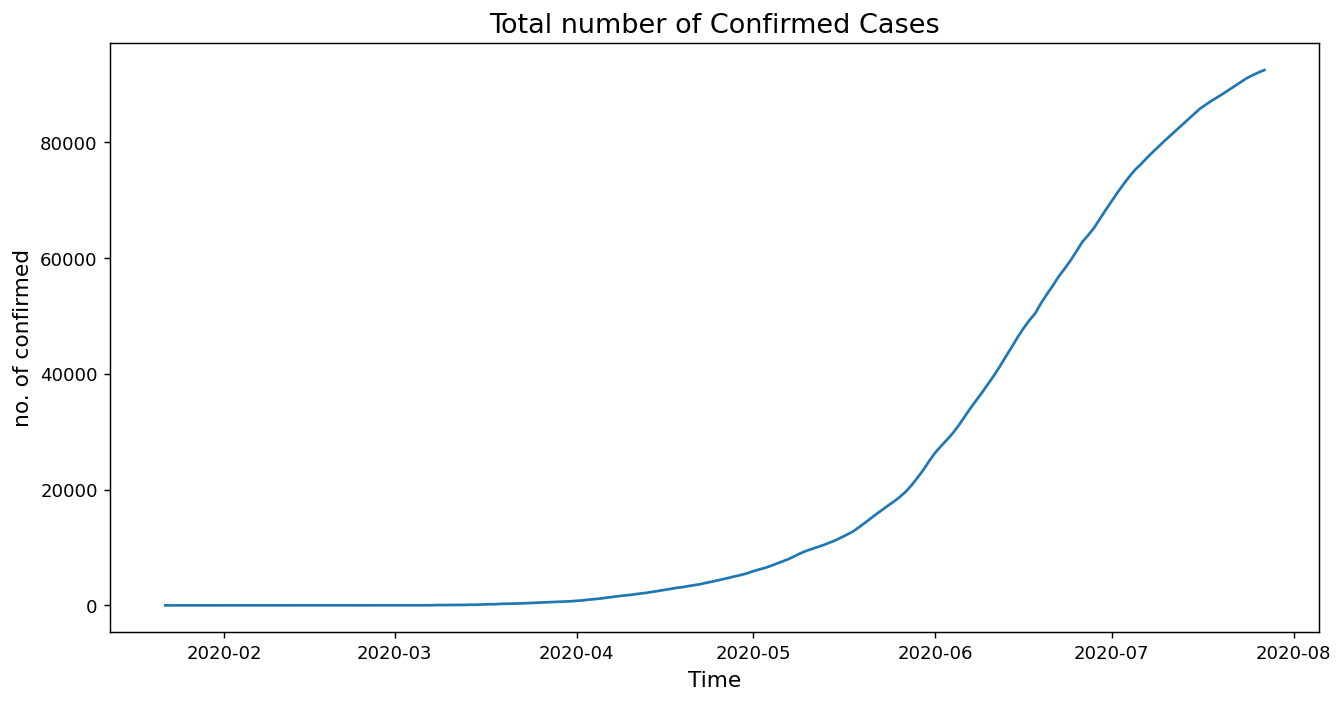

In [128]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Cases', fontsize=15)


plt.plot(conf_egy)


plt.show()

we can notice that by 27-7-2020 the confirmed cases in egypt reached 92482 cases.

In [129]:
nc_egy= df_egy.groupby("Date")["new_cases"].sum()
nc_egy

#nc_egy: total number of the new cases for each day in Egypt.

Date
2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
             ... 
2020-07-23    668
2020-07-24    659
2020-07-25    511
2020-07-26    479
2020-07-27    420
Name: new_cases, Length: 188, dtype: int64

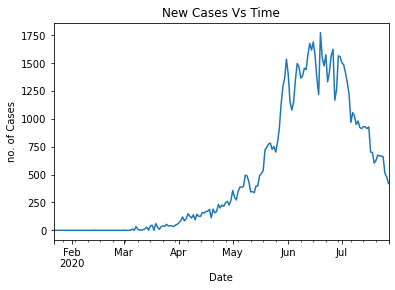

In [130]:
nc_egy.plot(title="New Cases Vs Time", ylabel="no. of Cases");

That's how was the distribution of the confirmed cases along the period.

In [131]:
nc_egy_mnth = df_egy.groupby("month")["new_cases"].sum()
nc_egy_mnth

#nc_egy_mnth: number of the whole new cases for each month in Egypt.

month
1        0
2        1
3      709
4     4827
5    19448
6    43326
7    24171
Name: new_cases, dtype: int64

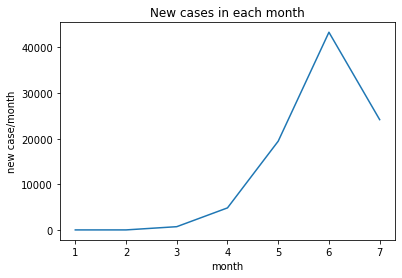

In [132]:
nc_egy_mnth.plot(ylabel=("new case/month"), title="New cases in each month");

We can see that the peak of the new cases was in June with 43326 Cases.

In [133]:
nc_egy_per_hr= nc_egy_mnth /(30*24)
nc_egy_per_hr

#nc_egy_per_hr: number of new cases per hour in Egypt for each month.

month
1     0.000000
2     0.001389
3     0.984722
4     6.704167
5    27.011111
6    60.175000
7    33.570833
Name: new_cases, dtype: float64

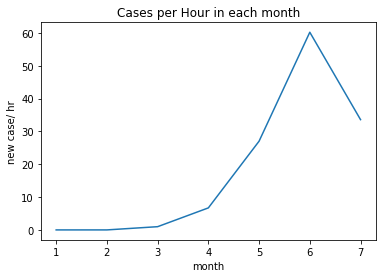

In [134]:
nc_egy_per_hr.plot(ylabel=("new case/ hr"), title="Cases per Hour in each month");

in June there wer 60 new case per hour in Egypt.

In [135]:
dth_egy= df_egy.new_death.sum()
dth_egy

#dth_egy: number of the whole confirmed deaths in Egypt.

4652

In [136]:
dth_egy_prcnt= dth_egy/cases *100
dth_egy_prcnt

#dth_egy_prcnt: percentage of Deaths out of the whole cases in Egypt.

5.0301680326982545

Egypt lost 4652 Cases in this period with 5.03% of the whole cases in Egypt.

In [137]:
conf_egy_dth= df_egy.groupby("Date")["Deaths"].sum()
conf_egy_dth

#conf_egy_dth: number of the confirmed Deaths in Egypt for each day.

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-07-23    4480
2020-07-24    4518
2020-07-25    4558
2020-07-26    4606
2020-07-27    4652
Name: Deaths, Length: 188, dtype: int64

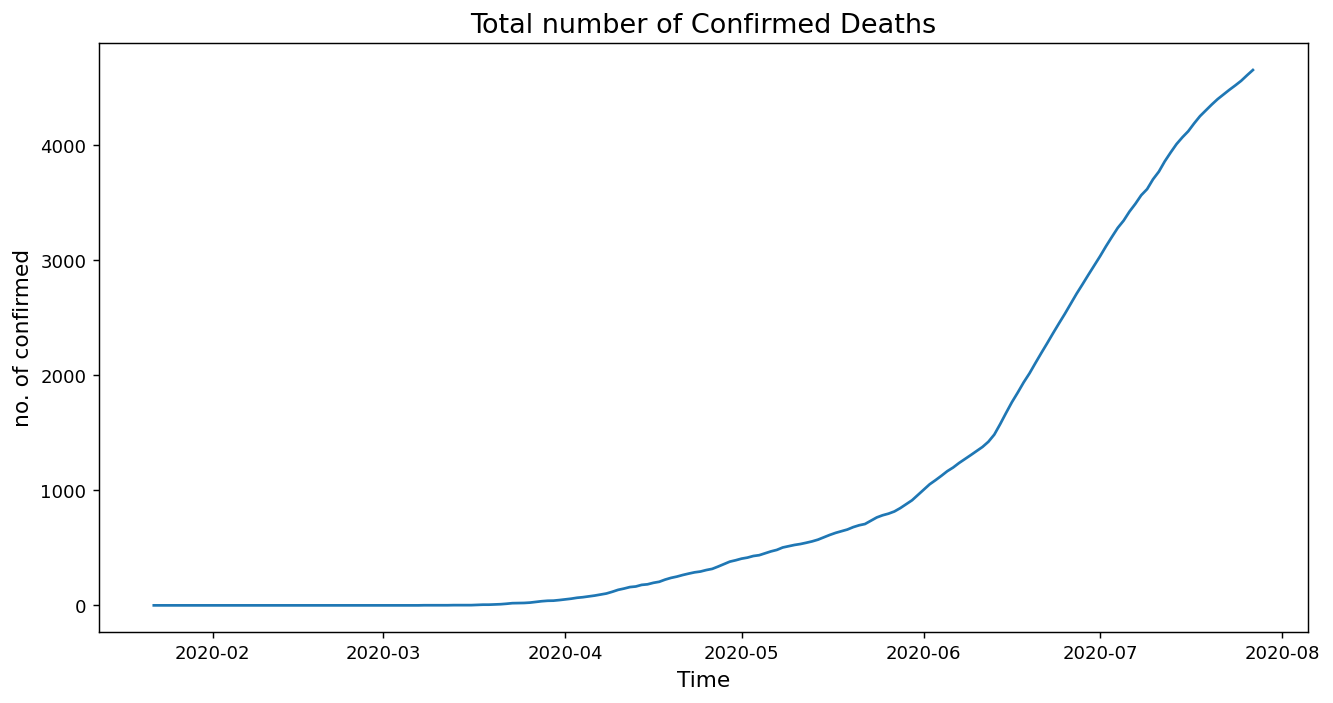

In [138]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Deaths', fontsize=15)


plt.plot(conf_egy_dth)


plt.show()

by 27-07-2020 Egypt lost 4652 cases, and we can see the distribution along the time.

In [139]:
nd_egy= df_egy.groupby("Date")["new_death"].sum()
nd_egy

#nd_egy: total number of the new Deaths of each day in Egypt.

Date
2020-01-22     0
2020-01-23     0
2020-01-24     0
2020-01-25     0
2020-01-26     0
              ..
2020-07-23    40
2020-07-24    38
2020-07-25    40
2020-07-26    48
2020-07-27    46
Name: new_death, Length: 188, dtype: int64

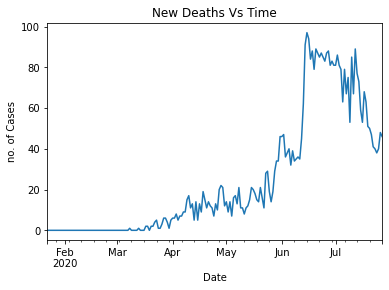

In [140]:
nd_egy.plot(title="New Deaths Vs Time", ylabel="no. of Cases");

we can see how was the deaths each day, and how was the sudden increasing by June.

In [141]:
nd_egy_mnth = df_egy.groupby("month")["new_death"].sum()
nd_egy_mnth

#nd_egy_mnth: total number of the new Deaths of each month in Egypt.

month
1       0
2       0
3      46
4     346
5     567
6    1994
7    1699
Name: new_death, dtype: int64

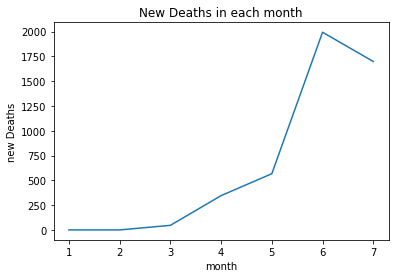

In [142]:
nd_egy_mnth.plot(ylabel=("new Deaths"), title="New Deaths in each month");

The Peak was in June with 1994 deaths in Egypt.

In [143]:
nd_egy_per_day= nd_egy_mnth /(30)
nd_egy_per_day

#nd_egy_per_day: number of deaths per day in Egypt for each month.

month
1     0.000000
2     0.000000
3     1.533333
4    11.533333
5    18.900000
6    66.466667
7    56.633333
Name: new_death, dtype: float64

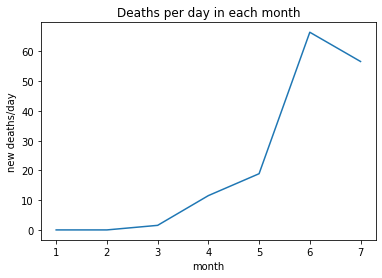

In [144]:
nd_egy_per_day.plot(ylabel=("new deaths/day"), title="Deaths per day in each month");

in June Egypt were Losing 66 Cases per day.

In [145]:
rec_egy= df_egy.new_recovered.sum()
rec_egy

#rec_egy: number of the whole confirmed recovered Cases in Egypt.

34838

In [146]:
rec_egy_prcnt= rec_egy/cases *100
rec_egy_prcnt

#rec_egy_prcnt: percentage of the recovered cases out of the whole cases in Egypt.

37.670033087519734

Egypt had 34838 Cases succeded to recover with 37.67% out of the whole cases. 

In [147]:
conf_egy_rec= df_egy.groupby("Date")["Recovered"].sum()
conf_egy_rec

#conf_egy_rec: number of the confirmed recovered cases in the Egypt each day.

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-23    31066
2020-07-24    31970
2020-07-25    32903
2020-07-26    33831
2020-07-27    34838
Name: Recovered, Length: 188, dtype: int64

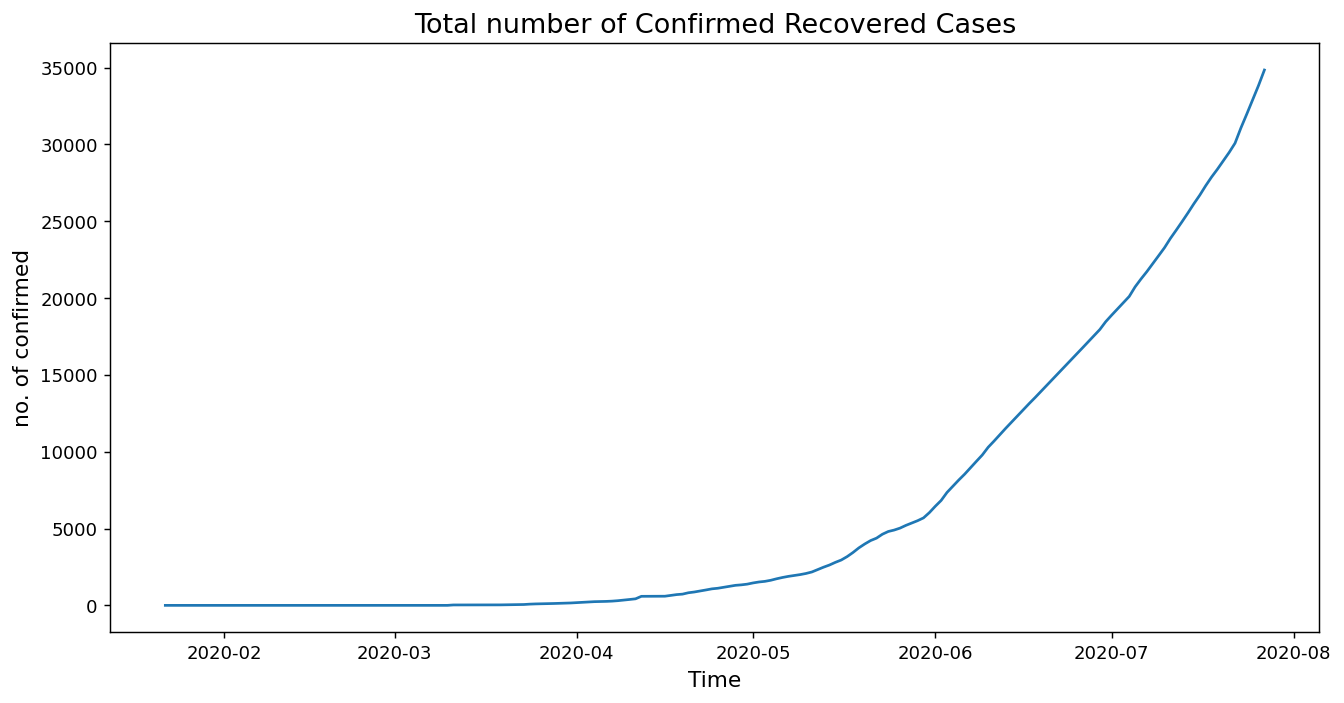

In [148]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Recovered Cases', fontsize=15)


plt.plot(conf_egy_rec)


plt.show()

that's how was the number of recoveries increasing by days.

In [149]:
nr_egy= df_egy.groupby("Date")["new_recovered"].sum()
nr_egy

#nr_egy: total number of the new recovered cases of each day for Egypt.

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-07-23     991
2020-07-24     904
2020-07-25     933
2020-07-26     928
2020-07-27    1007
Name: new_recovered, Length: 188, dtype: int64

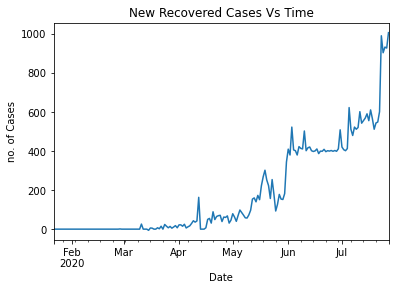

In [150]:
nr_egy.plot(title="New Recovered Cases Vs Time", ylabel="no. of Cases");

Here we can see the number of new recoveries for each day.

In [151]:
nr_egy_mnth = df_egy.groupby("month")["new_recovered"].sum()
nr_egy_mnth

#nr_egy_mnth: total number of the new recovered cases of each month for Egypt.

month
1        0
2        1
3      156
4     1224
5     4656
6    12423
7    16378
Name: new_recovered, dtype: int64

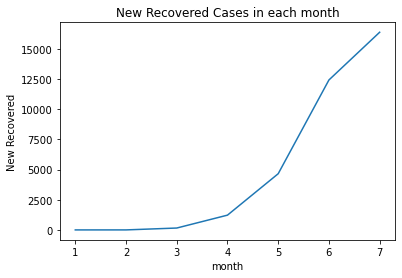

In [152]:
nr_egy_mnth.plot(ylabel=("New Recovered"), title="New Recovered Cases in each month");

July was the month of the highest number of recoveries in Egypt with 16378 Cases.

In [153]:
nr_egy_per_hr= nr_egy_mnth / (30*24)
nr_egy_per_hr


#nr_egy_per_hr: number of recovered cases per hour in Egypt for each month.

month
1     0.000000
2     0.001389
3     0.216667
4     1.700000
5     6.466667
6    17.254167
7    22.747222
Name: new_recovered, dtype: float64

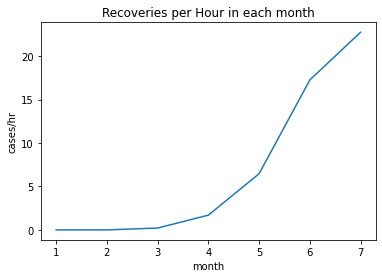

In [154]:
nr_egy_per_hr.plot(ylabel=("cases/hr"), title=("Recoveries per Hour in each month"));

by July Egypt was having 23 recoveries per hour.

In [155]:
conf_egy_actv= df_egy.groupby("Date")["Active"].sum()
conf_egy_actv

#conf_egy_actv: number of the confirmed Active cases in Egypt each day.

Date
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-07-23    54867
2020-07-24    54584
2020-07-25    54122
2020-07-26    53625
2020-07-27    52992
Name: Active, Length: 188, dtype: int64

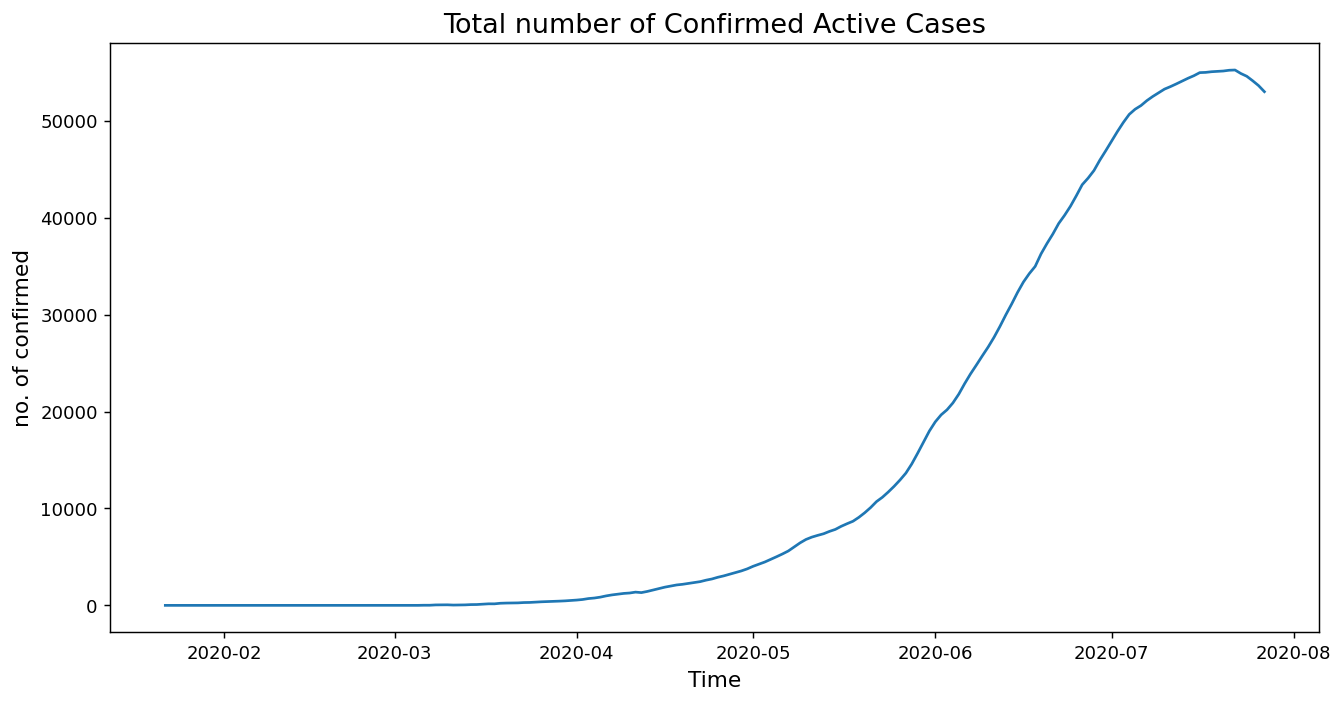

In [156]:
plt.figure(figsize=(12,6), dpi = 130)


plt.xlabel('Time', fontsize = 12)

plt.ylabel('no. of confirmed', fontsize = 12)

plt.title('Total number of Confirmed Active Cases', fontsize=15)


plt.plot(conf_egy_actv)


plt.show()

In [175]:
df_egy[df_egy["Active"]==df_egy.Active.max()]

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
34086,2020-07-22,Egypt,89745,4440,30075,55230,667,41,602,Eastern Mediterranean,7


Here we can see the umber of active cases in Egypt along the whole period,

22-07-2020 was the day of the highest number of Active Cases in Egypt.

In [158]:
#most new cases

egy_most_cases= df_egy[df_egy['new_cases']==df_egy.groupby("Date")["new_cases"].sum().max()]
egy_most_cases

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
27915,2020-06-19,Egypt,52211,2017,13928,36266,1774,79,400,Eastern Mediterranean,6


19-06-2020 was the day of the highest number of new Cases in Egypt with 1774 cases.

In [176]:
#most new Deaths

egy_most_deaths= df_egy[df_egy['new_death']==df_egy.groupby("Date")["new_death"].sum().max()]
egy_most_deaths

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
27167,2020-06-15,Egypt,46289,1672,12329,32288,1691,97,398,Eastern Mediterranean,6


15-06-2020 was the day of the highest number of Deaths in Egypt with 97 deaths.

In [177]:
#most new recovered

egy_most_rec= df_egy[df_egy['new_recovered']==df_egy.groupby("Date")["new_recovered"].sum().max()]
egy_most_rec

,Date,country,Confirmed,Deaths,Recovered,Active,new_cases,new_death,new_recovered,who_region,month
35021,2020-07-27,Egypt,92482,4652,34838,52992,420,46,1007,Eastern Mediterranean,7


27-07-2020 was the day of the highest number of Recoveries in Egypt with 1007 cases.

In [165]:
df_egy.groupby(["month" ])[['new_cases',"new_death", "new_recovered"]].sum()

,new_cases,new_death,new_recovered
month,,,
1,0,0,0
2,1,0,1
3,709,46,156
4,4827,346,1224
5,19448,567,4656
6,43326,1994,12423
7,24171,1699,16378


here we can see how was the situation in each month for new caes, new recoveries, and also the new deaths.

### Q8: which Countries were having the worst situations?

In [167]:
country_cases= df.groupby("country")["new_cases"].sum().sort_values(ascending=False)
country_cases

country
US                       4290258
Brazil                   2442375
India                    1480073
Russia                    816680
South Africa              452529
                          ...   
Dominica                      18
Saint Kitts and Nevis         17
Greenland                     14
Holy See                      12
Western Sahara                10
Name: new_cases, Length: 187, dtype: int64

**US** had the highest number of Cases with 4290258 cases.

**Brazil** comes second with 2442375 cases.

while **Western Sahara** comes last with just 10 cases.

In [168]:
country_dth= df.groupby("country")["new_death"].sum().sort_values(ascending=False)
country_dth

country
US                                  148011
Brazil                               87618
United Kingdom                       45844
Mexico                               44022
Italy                                35112
                                     ...  
Saint Vincent and the Grenadines         0
Saint Lucia                              0
Saint Kitts and Nevis                    0
Cambodia                                 0
Laos                                     0
Name: new_death, Length: 187, dtype: int64

again **US** on the top with 148011 Deaths.

and **brazil** comes second with 87618 Deaths.

we have many countries with zero recorded deaths, maybe just there was no recorded data for the deaths there.

In [169]:
country_dth_prcnt= country_dth/country_cases *100
country_dth_prcnt.sort_values(ascending=False)

country
Yemen                    28.562980
United Kingdom           15.194824
Belgium                  14.785934
Italy                    14.248034
Hungary                  13.399281
                           ...    
Mongolia                  0.000000
Papua New Guinea          0.000000
Saint Kitts and Nevis     0.000000
Seychelles                0.000000
Laos                      0.000000
Length: 187, dtype: float64

but by considering the death percentage out of the cases of each country, we can notice:

**Yemen** has the highest death ratio with 28.56% out of it's cases.

**United kingdom** comes second with 15.19%

In [178]:
country_rec= df.groupby("country")["new_recovered"].sum().sort_values(ascending=False)
country_rec

country
Brazil        1846641
US            1325804
India          951166
Russia         602249
Chile          319954
               ...   
Syria               0
Sweden              0
Serbia              0
Canada              0
Mozambique          0
Name: new_recovered, Length: 187, dtype: int64

**Brazil** has the highest number of recoveries with 1846641 cases.

**US** comes second with 1325804 cases.

In [171]:
country_rec_prcnt= country_rec/country_cases *100
country_rec_prcnt.sort_values(ascending=False)

country
Dominica      100.000000
Holy See      100.000000
Grenada       100.000000
Djibouti       98.379126
Iceland        98.327940
                 ...    
Syria           0.000000
Sweden          0.000000
Canada          0.000000
Serbia          0.000000
Mozambique      0.000000
Length: 187, dtype: float64

**DOminica, Holy See, and Grenada** all had 100% recovery percentage out of the confirmed cases in each of them

**Djibouti** comes second with 98.38%

In [172]:
country_actv= df[df["Date"]=="2020-07-27"].groupby("country")["Active"].sum().sort_values(ascending=False)
country_actv

country
US                2816444
Brazil             508116
India              495499
United Kingdom     254427
Russia             201097
                   ...   
San Marino              0
Dominica                0
Grenada                 0
Brunei                  0
Holy See                0
Name: Active, Length: 187, dtype: int64

by 27-07-2020 **US** had 2816444 Active cases.

while **Brazil** again Comes Second as it had 508116 Active Cases.

In [173]:
country_actv_prcnt= country_actv/country_cases *100
country_actv_prcnt.sort_values(ascending=False)

country
Timor-Leste    100.000000
Mozambique      99.353322
Serbia          97.750715
Namibia         94.085730
Syria           94.065282
                  ...    
Brunei           0.000000
Holy See         0.000000
Dominica         0.000000
Grenada          0.000000
San Marino       0.000000
Length: 187, dtype: float64

and here we can see the percentages of active cases out of the hole cases.

**Timor-Leste** had the highest percentage 100%

while **Mozambique** comes second with 99.4%

## Conclusions

in the period of 22-01-202 to 27-07-2020

> There were 16500952 confirmed cases all around the world.
>
> July was the mont of the highest number of new cases.
>
> by july there were 8376 new cases per hour.

> there were 654019 Deaths.
>
> the death percentage out of the whole cases were 2.96%
>
> April was the month of the most Deaths with 190226 Deaths; there were 264 deaths per hour.

> There were 9468059 Recoveries with 57.38% out of the whole cases.
>
> July was the month of the most recoveries with 4186628 cases; there were 5815 recoveries per hour.

> by the end of the period there were 6358362 Active cases with 38.533% out of the whole cases.

> Americas was the WHO-Region of the most Cases with 8842455 cases with 53.58%
>
> Americas was the WHO-Region of the most Deaths with 342732 cases with 52.4%
>
>Americas also had the highest number of active cases at te end of the period with 4027938 cases with 63.3% out of the whole active cases in the word.
>
>Americas had the highest number of recoveries at the end of the period with 4468616  cases with 47.2% out of the whole recoveries in the world.
>
>**Europe** has the highest death ratio with 6.37%, while **Africa** has the lowest death ratio with 1.69%.
>
>**Eastern Mediterranean** has the highest Recovery percentage out of it's whole cases with 80.58%
>
>**Eastern Mediterranean** has the lowest percentage of active cases out of the whole cases of the region with 16.84%

> the number of the confirmed cases in the Eastern Mediterranean was 1490854 cases
> June was the month of the peak of the new cases in the region with 557430 cases.
>
> June was on the top as there were 774 new case per hour in the eastern Mediterranean.
>
> the Eastern Mediterranean had 38339 Deaths with 2.57% of the whole cases in the region.
>
> th Eastern Mediterranean  had 1201400 recoveries with 80.58% out of the whole cases in the region.
>
> by the end of the period, the region were having 251005 case still active, with 16.84% out of the whole cases in the region.

> Iran had the highest number of cases 293606 cases with 19.7% of the cases in the region. Pakistan comes second with 274289 cases with 18.4%
>
> Egypt had the highest number of cases 52992 cases with 21.1% of the cases in the region. Saudi Arabia comes second with 43238 cases with 17.2%
>
> Iran had the highest number of deaths 15912 deaths with 41.5% of the Deaths in the region. Pakistan comes second with 5842 deaths with 15.2%
>
> Iran had the highest number of recoveries 255144 cases with 21.2% of the recovery cases in the region. Pakistan comes second with 241026 cases with 20.1%
>
> for the percentage of deaths out of cases in each country in the region, **Yemen** has the highest percentage 28.56%, then **Sudan** with 6.3%
>
> for the percentage of Recoveries out of cases in each country in the region, 
 **Djibouti** has the highest percentage 98.37%, then **Qatar** with 97.02%
>
> for the percentage of the Actives cases out of cases in each country in the region on 27-7-202, **Syria** has the highest percentage 94.07%, then **libya** with 77.33%
>
> 14-06-2020 in pakistan was the day of the highest number of new cases with 12073 cases.
>
> 21-07-2020 in Iran was the day of the highest number of new Deaths with 229 Deaths.
>
> 17-07-2020 in pakistan was the day of the highest number of new Recoveries with 19772 cases.
>
> 01-07-2020 in pakistan was the day of the highest number of Active Cases with 108642 cases.

> by 27-7-2020 the confirmed cases in egypt reached 92482 cases.
> 
> the peak of the new cases in Egypt was in June with 43326 Cases.
>
> Egypt lost 4652 Cases in this period with 5.03% of the whole cases in Egypt.
>
> The Peak pf deaths in Egypt was in June with 1994 deaths.
>
> Egypt had 34838 Cases succeded to recover with 37.67% out of the whole cases. 
>
> July was the month of the highest number of recoveries in Egypt with 16378 Cases.
>
> 22-07-2020 was the day of the highest number of Active Cases in Egypt with 55230 cases.
>
> 19-06-2020 was the day of the highest number of new Cases in Egypt with 1774 cases.
>
> 15-06-2020 was the day of the highest number of Deaths in Egypt with 97 deaths.
>
> 27-07-2020 was the day of the highest number of Recoveries in Egypt with 1007 cases.

> **US** had the highest number of Cases with 4290258 cases. **Brazil** comes second with 2442375 cases. while **Western Sahara** comes last with just 10 cases.
> 
> **US** on the top with 148011 Deaths. and **brazil** comes second with 87618 Deaths.
>
> **Yemen** has the highest death ratio with 28.56% out of it's cases. **United kingdom** comes second with 15.19%
>
> **Brazil** has the highest number of recoveries with 1846641 cases. **US** comes second with 1325804 cases.
>
>**DOminica, Holy See, and Grenada** all had 100% recovery percentage out of the confirmed cases in each of them, **Djibouti** comes second with 98.38%
>
> by 27-07-2020 **US** had 2816444 Active cases. while **Brazil** again Comes Second as it had 508116 Active Cases.
>
> for the ratios of the active cases **Timor-Leste** had the highest percentage 100%, while **Mozambique** comes second with 99.4%


In [ ]:
>
